<a href="https://colab.research.google.com/github/ljs7463/AnalysisProject/blob/master/%EA%B0%9C%EC%9D%B8%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8/2.%20Shoppingmall_analysis/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분석의 목적
데이터를 통해 잘팔리고 인기있는 제품의 특징을 살펴보고 이를 비즈니스에 적용하기 위한 방안을 모색한다. 또한, 제품에 대한 실시간 데이터 가 들어왔을때 판매량을 예측할 수 있는 모델을 만든다.

데이터 선정이유 : 좋아하는 도메인은 게임과 이커머스 산업이다. 그중에서도 특히 고객(Customer, User, Client)들에게 집중하여 효율을 내고 개선하고, 비즈니스를 만들어가는것을 좋아한다. 이번데이터는 이커머스에서 쇼핑몰 회사에서 일을 한다고 가정을 하고 싶었고, 한시즌의 쇼핑몰 데이터를 통해서 어떠한 결과와 분석을 할 수 있을지 알아보고 싶었고, 이를 통해 도메인적인 관점을 키우고 싶었다.

# 데이터 선정 이유
해당 데이터를 선정한 이유는 이커머스 도메인의 데이터 분석 능력을 기르기 위함이며, 그중 해당 데이터를 고르게 된 이유는 다른데이터셋의 경우 목표가 정해져 있습니다. 어떤것을 종속변수로 사용하고 독립변수로 사용할지와 결과가 어떻게 나와야 할지 이런 모든것들이 정해져있었지만, 이번에 선택한 이 데이터는 상품에 대한 정보만 나열되어있고 거기서 자유롭게 원한는 인사이트를 탐구해 볼 수 있으며 원하는 타겟을 정하여 모델링 해볼 수 있기 때문이었습니다.


In [1]:
!sudo apt-get install -y fonts-nanum  # 오픈폰트인 나눔폰트 설치
!sudo fc-cache -fv # matplotlib에 자체적으로 캐싱을 하고있는데 안에 폰트파일이 포함되어 있다 그래서 이 캐싱파일에 업데이트 되야 나눔폰트 설치한걸 인식해서 다 날려줌
!rm ~/.cache/matplotlib -rf # 설치한 나눔폰트를 적용

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [3]:
pip install shap

In [4]:
pip install pdpbox

In [5]:
!pip install wordcloud

In [6]:
!pip install --upgrade seaborn

## < 컬럼 해석 >

tittle : 상품제목(유럽국가용으로 현지화된 제목)

tittle_orig : 원래 영어로된 상품 제목

Price :  제품가격

retail_price : 소비자 가격(소매가격)

currency_buyer : 가격의 통화

units_sold : 판매량

uses_ad_boosts : 판매자가 플랫폼내에서 광고나 상단고정과 같은 추가 비용 지불여부

rating : 평균 제품 등급

rating_count : 제품의 등급개수 총합

rating_five_count : 별5개등급

badges_count : 제품 또는 판매자가 보유한 배지 수

badge_local_product : 현지에서 생산된 제품 배지

badge_product_quality : 많은 구매자가 지속적으로 좋은 평가 했을때 수여되는 배지

badge_fast_shipping : 제품의 주문이 지속적으로 빠르게 배송될때 수여되는 배지

tags : 사용자가 설정한 태그 

product_color : 제품의 주요 색상

product_variation_size_id : 해당 제품의 변경 가능한 사이즈

product_variation_inventory : 판매자의 최대 허용 수량

shipping_option_name : 배송 옵션(표준배송 등등)

shipping_option_price : 배송비

shipping_is_express : 배송 급행 여부

countries_shipped_to : 상품이 배송가능 한 국가 설정수

inventory_total : 모든 제품 변형에 대한 총 재고(크기/ 생상 변형)

has_urgency_banner : 긴급한 베너가 있었는지

urgency_text : 검색 결과의 일부 제품 위에 나타나는 텍스트 베너

origin_country : 원산지

merchant_tittle : 판매자의 표시 이름(UI에 판매자 상품 이름으로 표시)

merchant_name : 판매자 이름

merchant_info_subtitle : 판매자 정보 섹션에 사용자에게 표시되는 자막텍스트

merchant_rating_count : 이 판매자의 평가 수

merchant_rating : 상인의 평가

merchant_id : 판매자 고유 ID

merchant_has_profile_picture : merchant_profile_picture의 URL여부

merchant_profile_picture : 판매자의 프로필 사진 여부

product_url : 제품 페이지에 대한 URL

product_picture : 상품 사진 URL

product_id : 상품 id

theme : 웹사이트에서 상품검색시 사용하는 테마

crawl_month : 크롤링한 날짜


# EDA

## 데이터 확인하기

In [7]:
# 사용한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import platform

from collections import Counter
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from wordcloud import WordCloud
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from pdpbox.pdp import pdp_isolate, pdp_plot

In [8]:
# 사용한 함수

# 1. 이상치 확인 함수
def find_outlier_by_Tukey(data):
  q1, q3 = np.percentile(data,[25, 75])

  iqr = q3 - q1

  lower_bound = q1 - (iqr * 1.5) # Q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5) # Q1 + (iqr * 1.5)

  
  return lower_bound, upper_bound

In [9]:
# 데이터 불러오기
main_df = pd.read_csv('/content/Raw_data.csv')
main_df 

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",navyblue,S,50,Livraison standard,2,0,41,50,NaN,NaN,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summe

In [10]:
# 데이터 정보 확인
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [11]:
# 결측값 확인
main_df.isnull().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

In [12]:
# 데이터 집계 확인
main_df.describe(include='all')

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
count,1573,1573,1573.000000,1573.000000,1573,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573,1532,1559,1573.000000,1573,1573.000000,1573.000000,1573.000000,1573.000000,473.0,473,1556,1573,1569,1572,1.573000e+03,1573.000000,1573,1573.000000,226,1573,1573,1573,1573,1573
unique,1201,1203,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1230,101,106,NaN,15,NaN,NaN,NaN,NaN,NaN,2,6,958,957,1058,NaN,NaN,958,NaN,125,1341,1341,1341,1,1
top,Nouvelle mode d'été femmes robe décontractée c...,New Fashion Summer Women Casual Dress Round Ne...,NaN,NaN,EUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Summer,Fashion,Necks,Skirts,Dress,Loose,Women'...",black,S,NaN,Livraison standard,NaN,NaN,NaN,NaN,NaN,Quantité limitée !,CN,guangzhouweishiweifushiyouxiangongsi,广州唯适唯服饰有限公司,"83 % avis positifs (32,168 notes)",NaN,NaN,558c2cdc89d53c4005ea2920,NaN,https://s3-us-west-1.amazonaws.com/sweeper-pro...,https://www.wish.com/c/5eb2200b989caa081980b812,https://contestimg.wish.com/api/webimage/5ec1e...,5eba05b08c884a0bddd0ad96,summer,2020-08
freq,24,24,NaN,NaN,1573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,302,641,NaN,1508,NaN,NaN,NaN,NaN,NaN,472,1516,15,15,14,NaN,NaN,15,NaN,12,3,3,3,1573,1573
mean,NaN,NaN,8.325372,23.288620,NaN,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,95.735602,0.105531,0.018436,0.074380,0.012715,NaN,NaN,NaN,33.081373,NaN,2.345200,0.002543,40.456453,49.821360,1.0,NaN,NaN,NaN,NaN,NaN,2.649583e+04,4.032345,NaN,0.143675,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,3.932030,30.357863,NaN,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,214.075544,0.340709,0.134565,0.262472,0.112075,NaN,NaN,NaN,21.353137,NaN,1.024371,0.050379,20.301203,2.562799,0.0,NaN,NaN,NaN,NaN,NaN,7.847446e+04,0.204768,NaN,0.350871,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,0.000000,6.000000,1.000000,1.0,NaN,NaN,NaN,NaN,NaN,0.000000e+00,2.333333,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,5.810000,7.000000,NaN,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,6.000000,NaN,2.000000,0.000000,31.000000,50.000000,1.0,NaN,NaN,NaN,NaN,NaN,1.987000e+03,3.917353,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,8.000000,10.000000,NaN,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,20.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,50.000000,NaN,2.000000,0.000000,40.000000,50.000000,1.0,NaN,NaN,NaN,NaN,NaN,7.936000e+03,4.040650,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,11.000000,26.000000,NaN,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,94.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,50.000000,NaN,3.000000,0.000000,43.000000,50.000000,1.0,NaN,NaN,NaN,NaN,NaN,2.456400e+04,4.161797,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# 필요없는 데이터 or  제거 

# title : 유럽국가용으로 현지화된제목으로  분석을 위해 영어로 된 타이틀로 통일하고 삭제
# currency_buyer : 통화의 종류로서 목적에 중요하지 않은 데이터이기 때문에 삭제
# product_color :  상품의 단순 색상을 나타내는 것으로서 삭제
# crawl_month : 크롤링한 날짜로서 필요하지 않기때문에 삭제
# theme : 웹사이트에서 상품검색시 사용하는 테마로서 모든상품이 summer테마이므로 삭제
# product_url : 제품페이지에 대한 url로 분석의 목적 달성에 필요하지 않기때문에 삭제
# product_picture : 상품사진 URL주소로 필요하지 않기때문에 삭제
# product_variation_size_id : 변경가능한 사이즈는 컬럼에 하나씩있는데 변경사이즈가 폯이 넓으면 영향을 미칠지 모르지만, 단 하나의 사이즈로 되어있는것으로 어떠한 인사이트를 기대하기 어렵다.


df = main_df.copy()
df = df.drop(columns = ['title', 'currency_buyer', 'product_color', 'crawl_month', 'theme', 'product_url', 'product_picture','product_variation_size_id'])
df

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,5e9ae51d43d6a96e303acdb0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,58940d436a0d3d5da4e95a38
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,5ea10e2c617580260d55310a
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,5cedf17ad1d44c52c59e4aca
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,5ebf5819ebac372b070b0e70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,0,41,50,NaN,NaN,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,NaN,5d5fadc99febd9356cbc52ee
1569,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,100,1,3.07,28,11.0,3.0,1.0,3.0,10.0,0,0,0,0,"Summer,Panties,Elastic,Lace,Casual pants,casua...",2,Livraison standard,1,0,26,50,1.0,Quantité limitée !,CN,sell best quality goods,sellbestqualitygoods,"(4,435 notes)",4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,5eccd22b4497b86fd48f16b4
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,0,11,50,NaN,NaN,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,NaN,5e74be96034d613d42b52dfe
1571,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,100,0,2.50,2,0.0,1.0,0.0,0.0,1.0,0,0,0,0,"Summer,fashion women,Fashion,Lace,Dresses,Dres...",36,Livraison standard,3,0,29,50,NaN,NaN,CN,modai,modai,77 % avis positifs (31 notes),31,3.774194,5d56b32c40defd78043d5af9,0,NaN,5eda07ab0e295c2097c36590


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title_orig                    1573 non-null   object 
 1   price                         1573 non-null   float64
 2   retail_price                  1573 non-null   int64  
 3   units_sold                    1573 non-null   int64  
 4   uses_ad_boosts                1573 non-null   int64  
 5   rating                        1573 non-null   float64
 6   rating_count                  1573 non-null   int64  
 7   rating_five_count             1528 non-null   float64
 8   rating_four_count             1528 non-null   float64
 9   rating_three_count            1528 non-null   float64
 10  rating_two_count              1528 non-null   float64
 11  rating_one_count              1528 non-null   float64
 12  badges_count                  1573 non-null   int64  
 13  bad

In [15]:
df.isnull().sum()

title_orig                         0
price                              0
retail_price                       0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
has_urgency_banner              1100
urgency_text                    1100
origin_country                    17
merchant_title                     0
m

데이터 종류 확인

***Nominal*** : uses_ad_boosts(추가 광고 집행여부)/ badge_local_product/ badge_product_quality/ badge_fast_shipping/ shipping_is_express/ has_urgency_banner/ origin_country/ merchant_has_profile_picture/merchant_profile_picture/


***Ordinal*** : badges_count(뱃지 수)/product_variation_size_id/

***Continuous***  : Price(가격)/ retail_price(소매가격)/ rating(등급비율평균)/ merchant_rating/

***Discrete*** : units_sold(판매량)/ rating_count/ shipping_option_price/ (rating_five_count~rating_one_count)/ product_variation_inventory/ countries_shipped_to/ inventory_total/ merchant_rating_count/ 

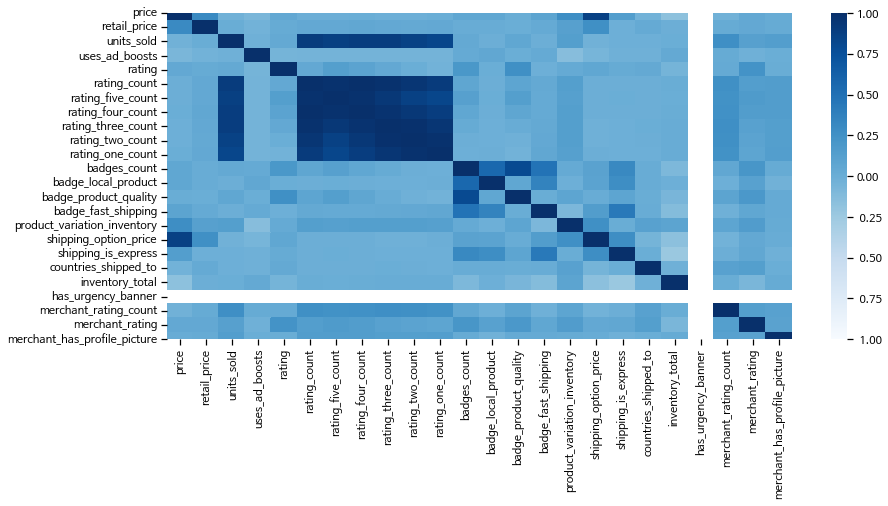

In [16]:
# raw데이터 상관관계 확인해보기
sns.set_context('notebook')

plt.figure(figsize = (14, 6))
sns.heatmap(df.corr(), vmin = -1, vmax =1,cmap = 'Blues')

- 1.판매량과 상품평가등급과 높은 상관관계를 보인다.
- 2.배송비와 가격과 높은 상관관계를 보인다


## 결측값 처리하기

- 1. 평점 등급 5개 결측값 처리하기

평점등급에 결측값이 있는 데이터를 살펴보니  모두 같은 데이터에 포함되어있으며 rating_count가 0이라는것을 알게 되었다.

In [17]:
# 평점 등급 결측지와 제품의 등급개수 총합의 관계 확인
df[df['rating_count']==0]

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_id
74,Fashion Women Sleeveless Lace Vest Loose V Nec...,8.00,33,10,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Vest,Fashion,Lace,V-neck,Women's Fashion,laceb...",50,Livraison standard,2,0,25,50,NaN,NaN,CN,WSLCWM,wslcwm,"88 % avis positifs (1,496 notes)",1496,4.169786,592955ef980a346d826f7bfc,0,NaN,5ed0dfc51fa8446451b19c0d
112,Womens Summer Fashion Lip Print 2pc Set Ladies...,5.00,51,10,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Summer,Shorts,Shirt,Sleeve,sportsset,short sle...",1,Livraison standard,1,0,36,50,NaN,NaN,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,5eb90ab5ad67f63678d15ed9
126,Women's Casual Sleeveless Stripe T Shirts Dres...,2.72,9,1,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Summer,Plus Size,Shirt,long dress,Dress,Women'...",1,Livraison standard,1,0,33,50,NaN,NaN,CN,Kyiswen,kyiswen,75 % avis positifs (378 notes),378,3.597884,5d417e7070327a2743021677,0,NaN,5ed3ae8e7bf8821d5cf4bc64
189,Women's Active Skort Athletic Stretchy Pleated...,5.00,5,10,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"ladies skort,running skirt,summer skirt,Golf,s...",50,Livraison standard,2,0,8,50,1.0,Quantité limitée !,CN,renpingping,renpingping,80 % avis positifs (129 notes),129,3.837209,5a3231f2e62bbc45b0bda1dd,0,NaN,5ed1c059630f990d1d44592c
216,Women's Sexy Push Up Bikini Vintage Set Sexy B...,11.00,30,10,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"woman fashion,Fashion,outside,Vintage,sexy bik...",50,Livraison standard,3,0,78,50,1.0,Quantité limitée !,CN,YIWU SHI AO HANG DIAN ZI SHANG WU YOU XIAN GON...,yiwushiaohangdianzishangwuyouxiangongsi,"91 % avis positifs (22,621 notes)",22621,4.295124,56025ed8293a5b2d24779bde,0,NaN,573db9316b335c34ca0513b8
248,Summer Fashion Tie-Dye Short Sleeve Long Dress...,8.00,9,7,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Summer,summer dress,Necks,Sleeve,long dress,pl...",5,Livraison standard,3,0,38,50,NaN,NaN,CN,"SHENZHEN LONGDRAGON TECHNOLOGY CO.,LTD",shenzhenlongdragontechnologycoltd,"87 % avis positifs (108,048 notes)",108048,4.052504,5417aada4ad3ab27e954b76c,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,5e8d70549f1504449514c8b9
309,Ladies Summer Tie Dye Print Short Sleeve Off S...,4.81,5,100,1,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Summer,Plus Size,Tie Dye,tiedyeprint,Dyes,Dres...",5,Envio Padrão,1,0,47,50,1.0,Quantité limitée !,CN,chaoyang_lizhen,chaoyang_lizhen,83% Feedback positivo (6 classificações),6,4.333333,5e5f6272d0e9af054214467e,0,NaN,5edda5aeb7160e568443c6e7
346,2020 New Women Summer Fashion O-neck Sleevele...,8.00,7,10,1,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Summer,Slim Fitting,Tank,summer tank top,Tops...",50,Livraison standard,3,0,10,50,NaN,NaN,CN,longming,longming,"85 % avis positifs (27,175 notes)",27175,3.966035,58a99ceca65ebc504a6ebf1e,0,NaN,5eccb8aa18e87d64f13e012c
348,Women Summer Fashion Cotton Overalls Sleeveles...,11.00,30,1,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"Summer,Fashion,Cotton,Casual pants,rompersforw...",10,Livraison standard,2,0,33,50,NaN,NaN,CN,caogao,caogao,"(1,380 notes)",1380,4.007246,5d4b8931933fb13f8a1fe232,0,NaN,5ebfdd5bebac37702b0b207b
375,Vintage Kawaii Harajuku T Shirt Women Ullzang ...,8.00,17,10,0,5.0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,"90sfashion,Summer,Fashion,Princess,cute,Kawaii...",50,Livraison standard,3,0,48,50,1.0,Quantité limitée !,CN,WenqiaoyouuOO,wenqiaoyouuoo,75 % avis positifs (8 notes),8,3.625000,5df1cd2ecce7510b506fdba5,0,NaN,5ec48b4f504db2c516aad131


상품의 평가등급은 판매량예측에 있어서 가장 중요한 요소가 되므로 결측값 처리에 신중을 요한다. 하지만, 상인의 평가 수 를 제외하면 유추할 만한 데이터가 없으며, 
이 또한 상관관계가 상대적으로 높을 뿐 1대1로 예측하는데 적합하지 않으므로 45개의 데이터를 삭제 하기로 결정하였다.

In [18]:
# 등급평가 결측값 제거하기
mask =df['rating_count']==0
df = df[~mask]
df

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,5e9ae51d43d6a96e303acdb0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,58940d436a0d3d5da4e95a38
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,5ea10e2c617580260d55310a
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,5cedf17ad1d44c52c59e4aca
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,5ebf5819ebac372b070b0e70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,0,41,50,NaN,NaN,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,NaN,5d5fadc99febd9356cbc52ee
1569,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,100,1,3.07,28,11.0,3.0,1.0,3.0,10.0,0,0,0,0,"Summer,Panties,Elastic,Lace,Casual pants,casua...",2,Livraison standard,1,0,26,50,1.0,Quantité limitée !,CN,sell best quality goods,sellbestqualitygoods,"(4,435 notes)",4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,5eccd22b4497b86fd48f16b4
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,0,11,50,NaN,NaN,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,NaN,5e74be96034d613d42b52dfe
1571,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,100,0,2.50,2,0.0,1.0,0.0,0.0,1.0,0,0,0,0,"Summer,fashion women,Fashion,Lace,Dresses,Dres...",36,Livraison standard,3,0,29,50,NaN,NaN,CN,modai,modai,77 % avis positifs (31 notes),31,3.774194,5d56b32c40defd78043d5af9,0,NaN,5eda07ab0e295c2097c36590


- 2. 원산지 결측값 처리하기

In [19]:
# 원산지 데이터 살펴보기
print('결측값 수 :',df['origin_country'].isnull().sum())
print('-------------------------------------------')
print('원산지 국가 :',df['origin_country'].unique())
print('-------------------------------------------')
print('비율 :', df['origin_country'].value_counts(normalize = True))
print('-------------------------------------------')

결측값 수 : 17
-------------------------------------------
원산지 국가 : ['CN' 'US' nan 'VE' 'SG' 'GB']
-------------------------------------------
비율 : CN    0.974189
US    0.020516
VE    0.003309
SG    0.001324
GB    0.000662
Name: origin_country, dtype: float64
-------------------------------------------


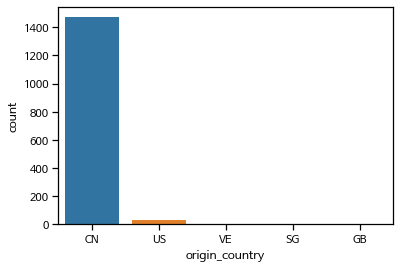

In [20]:
sns.countplot(x =df['origin_country'])

In [21]:
# 97%를 차지하는 중국으로 결측값 채우기
df['origin_country'] = df['origin_country'].fillna('CN')
print('전처리 후 결측값 확인 :',df['origin_country'].isnull().sum())

전처리 후 결측값 확인 : 0


- 3. 판매자 이름 결측값 처리

In [22]:
# 판매자 이름 분포 살펴보기
null = df['merchant_name'].isnull().sum()
print(f'판매자 이름의 결측값의 개수는{null}개 이다.')
print('---------------------------------------------------------')
df['merchant_name'].value_counts().head(30)

판매자 이름의 결측값의 개수는4개 이다.
---------------------------------------------------------


广州唯适唯服饰有限公司                              15
greatexpectationstechnology              12
sjhdstoer                                 9
shuilingjiaointernationaltradecompany     8
sangboostore                              8
cenicbeauty                               8
pentiumhorse                              7
sklioppp                                  6
hellohorse                                6
zuilangmands                              6
fengjinying                               6
sarahouse                                 6
snowgirl                                  6
smarthomeinternationalcoltd               6
leiston                                   5
myunxiaodian                              5
maxnina                                   5
zhuangyuping1                             5
maryswill                                 5
owiner                                    5
alabaostore                               5
xiejiatang                                5
witkeybl                        

판매자 이름 컬럼의 경우 하이커디널리티이며, 특정인물이 독점하지도 않는 모습을 나태내고 있다. 또한 예측을 하기에도 어렵고 결측 데이터가 4개에 불과하기 때문에 해당 데이터를 삭제할 것이다.

In [23]:
# 판매자 이름 결측지 제거

df = df.dropna(subset = ['merchant_name'], how = 'any', axis =0)
null2 = df['merchant_name'].isnull().sum()
print(f'판매자 이름의 결측값의 개수는{null2}개 이다.')

판매자 이름의 결측값의 개수는0개 이다.


- 4. 긴급한 베너가 있는지여부, 검색결과와 일부 제품위에 나타나는 텍스트 베너 결측값 처리

urgency_text
- Quantité limitée : 수량한정
- Réduction sur les achats en gros : 도매 구매 할인

In [24]:
# 결측지가 아닌 모든 상품에 베너가 부착되어있음을 알 수 있다.
df['has_urgency_banner'].value_counts(normalize = True)

1.0    1.0
Name: has_urgency_banner, dtype: float64

In [25]:
# 긴급 베너 텍스트 확인
df['urgency_text']

0       Quantité limitée !
1       Quantité limitée !
2       Quantité limitée !
3                      NaN
4       Quantité limitée !
               ...        
1568                   NaN
1569    Quantité limitée !
1570                   NaN
1571                   NaN
1572                   NaN
Name: urgency_text, Length: 1524, dtype: object

In [26]:
df['urgency_text'].unique()

array(['Quantité limitée !', nan, 'Réduction sur les achats en gros'],
      dtype=object)

In [27]:
df['urgency_text'].value_counts(normalize = True)

Quantité limitée !                  0.997821
Réduction sur les achats en gros    0.002179
Name: urgency_text, dtype: float64

모든 상품에 베너가 붙어있으며 99.7%는 한정슈량 베너이며, 0.03%는 도매 구매 할인 베너이다. 모든상품에 부착되어있으면서 99프로가 같은 베너이다. 따라서, 결측값을 제거해 주는 것이 아닌 컬럼 자체를 삭제해 준다.

In [28]:
# 베너 컬럼 두개 삭제
df = df.drop(columns = ['urgency_text', 'has_urgency_banner'], axis = 1)
df

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,0,34,50,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,5e9ae51d43d6a96e303acdb0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,0,41,50,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,58940d436a0d3d5da4e95a38
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,0,36,50,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,5ea10e2c617580260d55310a
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,0,41,50,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,5cedf17ad1d44c52c59e4aca
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,0,35,50,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,5ebf5819ebac372b070b0e70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,0,41,50,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,NaN,5d5fadc99febd9356cbc52ee
1569,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,100,1,3.07,28,11.0,3.0,1.0,3.0,10.0,0,0,0,0,"Summer,Panties,Elastic,Lace,Casual pants,casua...",2,Livraison standard,1,0,26,50,CN,sell best quality goods,sellbestqualitygoods,"(4,435 notes)",4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,5eccd22b4497b86fd48f16b4
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,0,11,50,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,NaN,5e74be96034d613d42b52dfe
1571,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,100,0,2.50,2,0.0,1.0,0.0,0.0,1.0,0,0,0,0,"Summer,fashion women,Fashion,Lace,Dresses,Dres...",36,Livraison standard,3,0,29,50,CN,modai,modai,77 % avis positifs (31 notes),31,3.774194,5d56b32c40defd78043d5af9,0,NaN,5eda07ab0e295c2097c36590


In [29]:
# merchant_profile_picture 컬럼은 결측지가 대부분이기 때문에 삭제
df = df.drop(columns = ['merchant_profile_picture'], axis = 1)
df

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,0,34,50,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,0,41,50,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,0,36,50,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,0,41,50,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,0,35,50,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,0,41,50,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee
1569,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,100,1,3.07,28,11.0,3.0,1.0,3.0,10.0,0,0,0,0,"Summer,Panties,Elastic,Lace,Casual pants,casua...",2,Livraison standard,1,0,26,50,CN,sell best quality goods,sellbestqualitygoods,"(4,435 notes)",4435,3.696054,54d83b6b6b8a771e478558de,0,5eccd22b4497b86fd48f16b4
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,0,11,50,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe
1571,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,100,0,2.50,2,0.0,1.0,0.0,0.0,1.0,0,0,0,0,"Summer,fashion women,Fashion,Lace,Dresses,Dres...",36,Livraison standard,3,0,29,50,CN,modai,modai,77 % avis positifs (31 notes),31,3.774194,5d56b32c40defd78043d5af9,0,5eda07ab0e295c2097c36590


In [30]:
# 결측값 제거 확인하기
df.isnull().sum()

title_orig                      0
price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_count                    0
rating_five_count               0
rating_four_count               0
rating_three_count              0
rating_two_count                0
rating_one_count                0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
tags                            0
product_variation_inventory     0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
origin_country                  0
merchant_title                  0
merchant_name                   0
merchant_info_subtitle          0
merchant_rating_count           0
merchant_rating                 0
merchant_id   

## 이상값 처리하기

- 1. price 이상치 처리

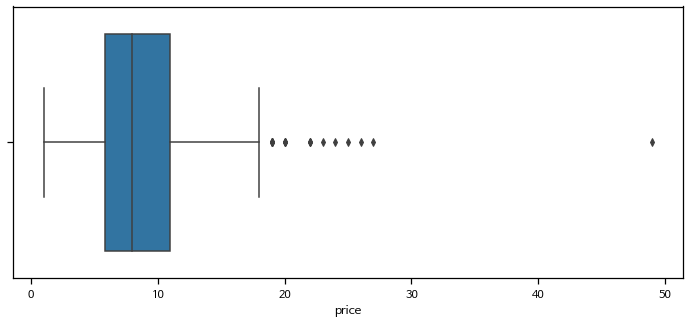

In [31]:
plt.figure(figsize =(12, 5))
sns.boxplot(df['price'])

price 이상치를 어떻게 할것인가??
해당 이상치는 human error 가 아니고 자연발생한 것이므로 삭제를 하게되면 충분히 설명이 되지못한다.


price의 경우 자연발생 이상치 이기때문에 삭제하는것은 올바른 방법이 아니다.

< 자연발생 이상치 제거 방법 >

대치: mode, mean등등 값으로 변환/ 통계적모델링(종속변수로 두어 독립변수로부터 유추)/binning

정규화 : Min-Max, Z-score
log transform, power transform
해당 방법중에서 max값으로 대체하는 방법을 사용할 것이다. 이유는 통계적모델링을 사용하기에는 알맞은 독립변수가 없고, 정규화와 로그변환은 충분히 사용가능하지만,

 ** max가격보다 높은 이상치들만 구성되어있고 소수의 데이터 이기 때문에 max값으로 imputation해주었다.**

In [32]:
# 중복값 확인
df.duplicated().sum()

220

중복값이 220개나 있는것이 확인되었다.(중복값을 미리 제거해주자..)

In [33]:
df = df.drop_duplicates(keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1572
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title_orig                    1304 non-null   object 
 1   price                         1304 non-null   float64
 2   retail_price                  1304 non-null   int64  
 3   units_sold                    1304 non-null   int64  
 4   uses_ad_boosts                1304 non-null   int64  
 5   rating                        1304 non-null   float64
 6   rating_count                  1304 non-null   int64  
 7   rating_five_count             1304 non-null   float64
 8   rating_four_count             1304 non-null   float64
 9   rating_three_count            1304 non-null   float64
 10  rating_two_count              1304 non-null   float64
 11  rating_one_count              1304 non-null   float64
 12  badges_count                  1304 non-null   int64  
 13  bad

다시 이상치를 들여다 보자.

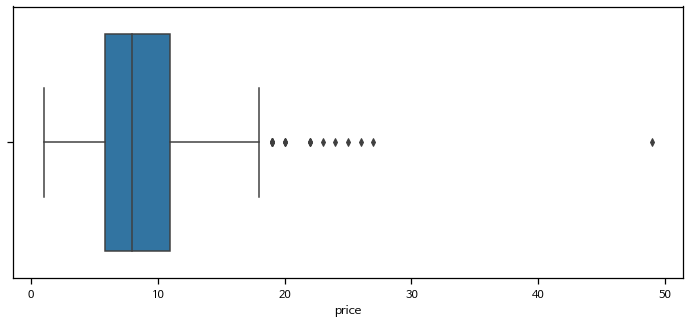

In [34]:
plt.figure(figsize =(12, 5))
sns.boxplot(df['price'])

In [35]:
# 이상치 확인 함수
def find_outlier_by_Tukey(data):
  q1, q3 = np.percentile(data,[25, 75])

  iqr = q3 - q1

  lower_bound = q1 - (iqr * 1.5) # Q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5) # Q1 + (iqr * 1.5)

  
  return lower_bound, upper_bound

find_outlier_by_Tukey(df['price'])

(-1.8499999999999988, 18.71)

In [36]:
# 이상치를 max값으로 치환
df.loc[df['price']>=19,'price'] = 18

In [37]:
df['price'].max()

18.0

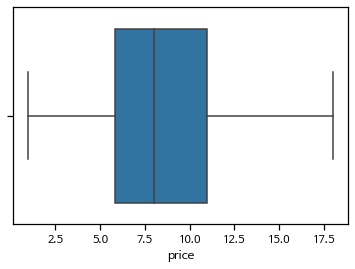

In [38]:
sns.boxplot(df['price'])

- 2. retail_price 이상치 처리

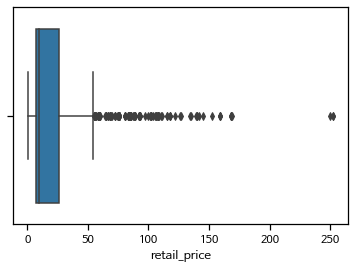

In [39]:
sns.boxplot(df['retail_price'])

In [40]:
# 이상치 확인 함수적용(price에서 함수 생성되어있음)
find_outlier_by_Tukey(df['retail_price'])

(-21.5, 54.5)

In [41]:
# 이상치를 max값으로 치환
df.loc[df['retail_price']>54.5] = 54

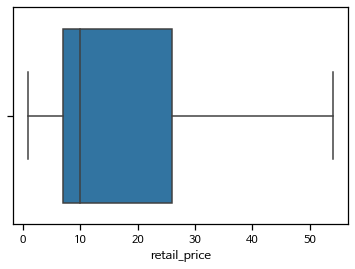

In [42]:
sns.boxplot(df['retail_price'])

- 3. units_sold 이상치 처리

해당 컬럼은 판매량에 대한 컬럼으로서 너무 많은 카디널리티를 가지고 있으며 판매량은 중요한 지표가 되는 값이다. 따라서 회귀모델로 예측하려고 계획을 세웠으나 이상치를 처리해야하는 번거로움과 분석의 목적이 잘팔리는 제품에 대한 분석이 때문에 특정 판매량을 기준으로 성공적인 판매여부를 구분할 수 있는 Classification문제로 변환해 줄것이다.


In [43]:
df['units_sold'].value_counts(normalize = True)

100       0.251534
1000      0.234663
54        0.140337
5000      0.139571
10000     0.111196
20000     0.063650
50        0.031442
10        0.012270
50000     0.009969
100000    0.004601
2         0.000767
Name: units_sold, dtype: float64

10000장 이상 팔렸을 경우 성공적인 판매 1, 그 미만의 판매량의 경우 성공적이지 못한 판매로 0이라는 값을 주어 binary형태로 변환한다.

**10000장 이상을 성공적인 판매여부로 정한 이유와 그외의 보충 설명** 
- 성공적인 판매여부는 해당회사에서 근무하는 분석가가 MD및 여러 직책의 동료분들과 상의하는게 기본이다.
- 하지만 데이터 분석가 혼자서 일을 한다는 가정하에 나는 유럽시장이며 수많은 국가를 대상으로 판매하고, 특히 여름이라는 지역적인 특성상 값이 싸고 많은 수요가 있기때문에 10000장은 되야 성공적인 판매라고 생각한다.
- 가령 1000장은 아니냐고 물어볼 수 있다. 하지만 1000장도 무시할 수 없는데이터라고 생각한다. 하지만 우리는 인기있는제품의 특징을 분석하는 것이며, 어느정도의 규모가 있어야 목표에 적합하다고 생각한다. 1000장보다 10000장을 파는것이 성공적인 판매에 가깝지 않은가?
- 20,000장도 아니고 10,000장인 이유 어느정도의 비율을 고려해 주었다. 20,000장 이상의 판매이상부터는 비율이 6%때로 현저히 낮아지기 때문에 극단의 성공을 목표로 하지 않는다.
- 1000장밖에 옷을 만들지 않아서 1000장을 판매한것이면 성공적인 판매가 아니냐고 물어볼 수 있다. 하지만, 역으로 1000장을 생산하여 1000장이팔렸다면 추가적으로 생산을 하게 되지않을까?? 또한, 더 팔릴수도 있을 상품이었는데 1000장만 인쇄한것이라면 오히려 해당 제품을 담당하는 분석가의 잘못이다.

In [44]:
# 성공적인 판매 여부 컬럼생성을 위한 데이터 출력
list = []
for i in df['units_sold']:
  if i >= 10000:
    list.append(1)
  elif i < 10000:
    list.append(0)

list

[0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,


In [45]:
# 성공적인 판매 여부 컬럼생성
df['successful_sold'] = list
df

,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id,successful_sold
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,0,34,50,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0,0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,0,41,50,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38,1
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,0,36,50,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a,0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,0,41,50,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca,0
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,0,35,50,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,New Summer Fashion Trousers Women Leggings Rip...,3.00,8,100,1,3.79,57,25.0,10.0,13.0,3.0,6.0,0,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",1,Livraison standard,1,0,41,50,CN,bujizhan,bujizhan,"(4,080 notes)",4080,3.987990,584a7a381591451e4e3af3df,0,5e8f0165e815903d022a3c7c,0
1567,Sleeveless Solid Color Women Jumpsuit Ladies S...,8.00,7,20000,1,4.25,3127,1919.0,580.0,304.0,128.0,196.0,1,0,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",50,Livraison standard,2,0,44,50,CN,Rell Mail,rellmail,"88 % avis positifs (16,803 notes)",16803,4.155032,56455b13b15aab129db58cb7,0,5c91a7ae7cfe8e4e64c36d97,1
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,0,41,50,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee,1
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,0,11,50,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe,0


In [46]:
# succeessful_sold컬럼에 사용된 units_sold컬럼 제거
df = df.drop(columns='units_sold', axis = 1)
df

,title_orig,price,retail_price,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id,successful_sold
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,0,34,50,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0,0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,0,41,50,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38,1
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,0,36,50,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a,0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,0,41,50,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca,0
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,0,35,50,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,New Summer Fashion Trousers Women Leggings Rip...,3.00,8,1,3.79,57,25.0,10.0,13.0,3.0,6.0,0,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",1,Livraison standard,1,0,41,50,CN,bujizhan,bujizhan,"(4,080 notes)",4080,3.987990,584a7a381591451e4e3af3df,0,5e8f0165e815903d022a3c7c,0
1567,Sleeveless Solid Color Women Jumpsuit Ladies S...,8.00,7,1,4.25,3127,1919.0,580.0,304.0,128.0,196.0,1,0,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",50,Livraison standard,2,0,44,50,CN,Rell Mail,rellmail,"88 % avis positifs (16,803 notes)",16803,4.155032,56455b13b15aab129db58cb7,0,5c91a7ae7cfe8e4e64c36d97,1
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,0,41,50,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee,1
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,0,11,50,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe,0


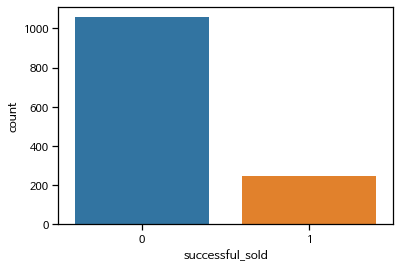

In [47]:
# 성공적인 판매 비율 시각화
sns.countplot(df['successful_sold'])

- 4. 평가등급 이상치 처리

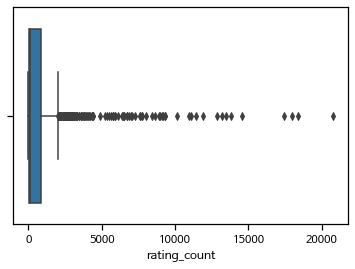

In [48]:
sns.boxplot(df['rating_count'])

In [49]:
# 이상치 값 확인
find_outlier_by_Tukey(df['rating_count'])

(-1135.375, 2025.625)

In [50]:
# 이상치 갯수 파악하기
len(df[df['rating_count']>2025])

154

In [51]:
# rating_count가 successful_sold에 리퀴지로 작용하지는 않을지 확인
print(df.loc[df['rating_count']<50]['successful_sold'].value_counts())
print('-'*50)
print(df.loc[df['rating_count']>300]['successful_sold'].value_counts())
print('-'*50)
print(df.loc[df['rating_count']>500]['successful_sold'].value_counts())
print('-'*50)
print(df.loc[df['rating_count']>1000]['successful_sold'].value_counts())

0    324
Name: successful_sold, dtype: int64
--------------------------------------------------
0    273
1    247
Name: successful_sold, dtype: int64
--------------------------------------------------
1    244
0    197
Name: successful_sold, dtype: int64
--------------------------------------------------
1    222
0     57
Name: successful_sold, dtype: int64


rating은 고객의 평가를 계량화한 척도이기 때문에 삭제할 수 없으며, rating_count역시 성공적인 판매와 연관성이 있기때문에 삭제하지 않았다, 그리고 평점을 1점부터5점까지 어디에 주었는지를 계량화한 컬럼역시 중요하다. 아무리 많이팔렸어도 그 제품이 나쁜평점을 많이 받을 수도 있기때문이다. 하지만, 해당내용은 나쁜평점이 왜 주어졌는지에 대한 텍스트 자료가 없기때문에 이유를 분석할 수 없을 뿐더러 신뢰가 떨어지기 때문에 삭제해준다.

In [52]:
df= df.drop(columns = ['rating_five_count', 'rating_four_count', 'rating_three_count', 'rating_two_count', 'rating_one_count'])
df

,title_orig,price,retail_price,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id,successful_sold
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,0,3.76,54,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,0,34,50,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0,0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,1,3.45,6135,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,0,41,50,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38,1
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,0,3.57,14,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,0,36,50,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a,0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,1,4.03,579,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,0,41,50,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca,0
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,1,3.10,20,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,0,35,50,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,New Summer Fashion Trousers Women Leggings Rip...,3.00,8,1,3.79,57,0,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",1,Livraison standard,1,0,41,50,CN,bujizhan,bujizhan,"(4,080 notes)",4080,3.987990,584a7a381591451e4e3af3df,0,5e8f0165e815903d022a3c7c,0
1567,Sleeveless Solid Color Women Jumpsuit Ladies S...,8.00,7,1,4.25,3127,1,0,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",50,Livraison standard,2,0,44,50,CN,Rell Mail,rellmail,"88 % avis positifs (16,803 notes)",16803,4.155032,56455b13b15aab129db58cb7,0,5c91a7ae7cfe8e4e64c36d97,1
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,1,4.08,1367,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,0,41,50,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee,1
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,0,3.71,59,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,0,11,50,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe,0


In [53]:
# rating_count 변환 
list_count =[]
for i in df['rating_count']:
  if i < 100:
    list_count.append(0)
  elif (i >= 100) & (i < 1000):
    list_count.append(1)

  elif i >= 1000:
    list_count.append(2)

# 위에 보이는것 처럼 코드를 짠이유는 보통 리뷰가 1000이 넘어간다고 해서 다보거나 하지 않을 뿐더러 1000역시도 보기에는 너무 많은지표이다.
# 그렇지만 자릿수가 다르기때문에 1000이라는 기준을 잡았으며 100보다 작은 리뷰와 구분하기 위해서 총 세가지로 나누어 주었다.

In [54]:
# 변경해준 값 넣어주기
df['rating_count'] = list_count
df

,title_orig,price,retail_price,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id,successful_sold
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,0,3.76,0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,0,34,50,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0,0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,1,3.45,2,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,0,41,50,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38,1
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,0,3.57,0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,0,36,50,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a,0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,1,4.03,1,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,0,41,50,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca,0
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,1,3.10,0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,0,35,50,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,New Summer Fashion Trousers Women Leggings Rip...,3.00,8,1,3.79,0,0,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",1,Livraison standard,1,0,41,50,CN,bujizhan,bujizhan,"(4,080 notes)",4080,3.987990,584a7a381591451e4e3af3df,0,5e8f0165e815903d022a3c7c,0
1567,Sleeveless Solid Color Women Jumpsuit Ladies S...,8.00,7,1,4.25,2,1,0,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",50,Livraison standard,2,0,44,50,CN,Rell Mail,rellmail,"88 % avis positifs (16,803 notes)",16803,4.155032,56455b13b15aab129db58cb7,0,5c91a7ae7cfe8e4e64c36d97,1
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,1,4.08,2,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,0,41,50,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee,1
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,0,3.71,0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,0,11,50,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe,0


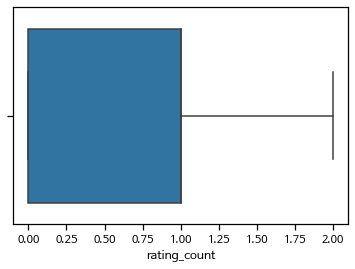

In [55]:
sns.boxplot(df['rating_count'])

In [56]:
# 0은 인기가 있지는 않은 제품, 1은 비교적 수요가 있는, 2는 매우 인기있는 제품
df['rating_count'].unique()

array([0, 2, 1])

중간 점검 및 필요없는 컬럼 정리

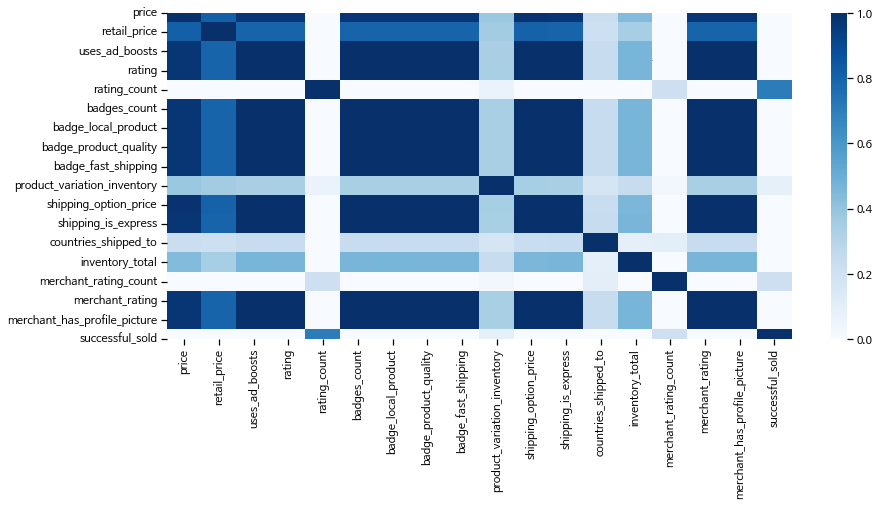

In [57]:
# 중간점검 히트맵
plt.figure(figsize = (14, 6))
sns.heatmap(df.corr(), vmin = 0, vmax = 1, cmap = 'Blues')

- 뱃지의 총 갯수는 뱃지종류들이 따로 있으며 각각 다른성격 이므로 총갯수로는 의미가 없어 제외시키며, 

- local_product의 뱃지경우 배송과 연관이 있기때문에 뒤에 있는 빠른배송 뱃지와 겹치게 된다. 만약 local_product가 다른것에 영향을 준다면 가지고 가야하지만 배송이외의 장점을 보이지 않고 있다. 이는 따로 지역상품에 대한 분석시 사용할 수 있기때문에 제외시킨다. 

- 그리고 남은 두개의 뱃지는 상품의 질은 중요한 요소이며 배송이 빠른것 또한 중요한 
요인으로 작용할 수 있다. 하지만 뒤에 나오는 shipping_is_express라는 배송 급행 여부 컬럼과 빠른 배송 뱃지가 겹치게 된다. 그래서 뒤에 나오는  shipping_is_express를 삭제해 준다.


In [58]:
df= df.drop(columns=['badges_count','badge_local_product','shipping_is_express'], axis = 1)
df

,title_orig,price,retail_price,uses_ad_boosts,rating,rating_count,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,countries_shipped_to,inventory_total,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_id,successful_sold
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,0,3.76,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,34,50,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0,0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,1,3.45,2,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,41,50,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38,1
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,0,3.57,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,36,50,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a,0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,1,4.03,1,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,41,50,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca,0
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,1,3.10,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,35,50,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,New Summer Fashion Trousers Women Leggings Rip...,3.00,8,1,3.79,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",1,Livraison standard,1,41,50,CN,bujizhan,bujizhan,"(4,080 notes)",4080,3.987990,584a7a381591451e4e3af3df,0,5e8f0165e815903d022a3c7c,0
1567,Sleeveless Solid Color Women Jumpsuit Ladies S...,8.00,7,1,4.25,2,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",50,Livraison standard,2,44,50,CN,Rell Mail,rellmail,"88 % avis positifs (16,803 notes)",16803,4.155032,56455b13b15aab129db58cb7,0,5c91a7ae7cfe8e4e64c36d97,1
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,1,4.08,2,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,41,50,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee,1
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,0,3.71,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,11,50,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe,0


- 5. 배송가능한 국가 수 

In [59]:
df['countries_shipped_to'].describe()

count    1304.000000
mean       42.319785
std        19.529651
min         6.000000
25%        33.000000
50%        41.000000
75%        48.000000
max       140.000000
Name: countries_shipped_to, dtype: float64

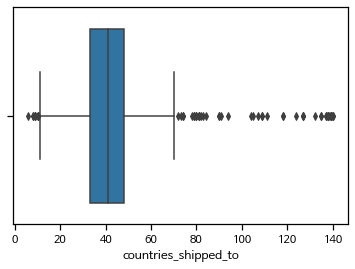

In [60]:
sns.boxplot(df['countries_shipped_to'])

In [61]:
find_outlier_by_Tukey(df['countries_shipped_to'])

(10.5, 70.5)

In [62]:
len(df[df['countries_shipped_to']>=48])

341

In [63]:
# 데이터의 75%를 기준으로 이보다 높으면 배송가능한국가가 매우많다
convert = []
for i in df['countries_shipped_to']:
  if i < 48:
    convert.append(0)
  else:
    convert.append(1)

In [64]:
df['countries_shipped_to'] = convert
df['countries_shipped_to']

0       0
1       0
2       0
3       0
4       0
       ..
1565    0
1567    0
1568    0
1570    0
1572    0
Name: countries_shipped_to, Length: 1304, dtype: int64

In [65]:
df['countries_shipped_to'].unique()

array([0, 1])

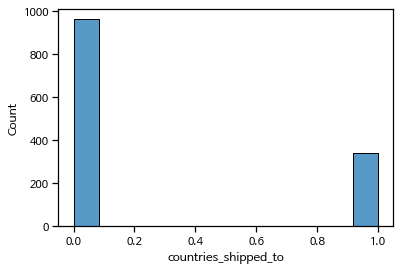

In [66]:
sns.histplot(df['countries_shipped_to'])

- 6. 모든 제품 변형에 대한 총 재고(크기/ 생상 변형) 이상치 처리

위에서 한 inventory관련 컬럼과 중복이 되므로 이상치 처리를 할필요 없이 삭제해 준다.

In [67]:
df =df.drop(columns ='inventory_total', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1572
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title_orig                    1304 non-null   object 
 1   price                         1304 non-null   float64
 2   retail_price                  1304 non-null   int64  
 3   uses_ad_boosts                1304 non-null   int64  
 4   rating                        1304 non-null   float64
 5   rating_count                  1304 non-null   int64  
 6   badge_product_quality         1304 non-null   int64  
 7   badge_fast_shipping           1304 non-null   int64  
 8   tags                          1304 non-null   object 
 9   product_variation_inventory   1304 non-null   int64  
 10  shipping_option_name          1304 non-null   object 
 11  shipping_option_price         1304 non-null   int64  
 12  countries_shipped_to          1304 non-null   int64  
 13  ori

- 7. 판매자의 평가 수 이상치 처리

판매자의 평가의 경우 판매자의 rating이 따로 있기때문에 삭제해줘도 괜찮을거 같다.

In [68]:
df= df.drop(columns = 'merchant_rating_count', axis =1)
df

,title_orig,price,retail_price,uses_ad_boosts,rating,rating_count,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,countries_shipped_to,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating,merchant_id,merchant_has_profile_picture,product_id,successful_sold
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,0,3.76,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,0,CN,zgrdejia,zgrdejia,(568 notes),4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0,0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,1,3.45,2,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,0,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38,1
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,0,3.57,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,0,CN,hxt520,hxt520,86 % avis positifs (295 notes),3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a,0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,1,4.03,1,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,0,CN,allenfan,allenfan,"(23,832 notes)",4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca,0
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,1,3.10,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,0,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,New Summer Fashion Trousers Women Leggings Rip...,3.00,8,1,3.79,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",1,Livraison standard,1,0,CN,bujizhan,bujizhan,"(4,080 notes)",3.987990,584a7a381591451e4e3af3df,0,5e8f0165e815903d022a3c7c,0
1567,Sleeveless Solid Color Women Jumpsuit Ladies S...,8.00,7,1,4.25,2,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",50,Livraison standard,2,0,CN,Rell Mail,rellmail,"88 % avis positifs (16,803 notes)",4.155032,56455b13b15aab129db58cb7,0,5c91a7ae7cfe8e4e64c36d97,1
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,1,4.08,2,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,0,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee,1
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,0,3.71,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,0,CN,shixueying,shixueying,86 % avis positifs (210 notes),3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe,0


## 기타 전처리 하기

추가적으로 필요없는 컬럼들 삭제하기

In [69]:
df

,title_orig,price,retail_price,uses_ad_boosts,rating,rating_count,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_name,shipping_option_price,countries_shipped_to,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating,merchant_id,merchant_has_profile_picture,product_id,successful_sold
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,0,3.76,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Livraison standard,4,0,CN,zgrdejia,zgrdejia,(568 notes),4.128521,595097d6a26f6e070cb878d1,0,5e9ae51d43d6a96e303acdb0,0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,1,3.45,2,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Livraison standard,2,0,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",3.899673,56458aa03a698c35c9050988,0,58940d436a0d3d5da4e95a38,1
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,0,3.57,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,Livraison standard,3,0,CN,hxt520,hxt520,86 % avis positifs (295 notes),3.989831,5d464a1ffdf7bc44ee933c65,0,5ea10e2c617580260d55310a,0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,1,4.03,1,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,Livraison standard,2,0,CN,allenfan,allenfan,"(23,832 notes)",4.020435,58cfdefdacb37b556efdff7c,0,5cedf17ad1d44c52c59e4aca,0
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,1,3.10,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,Livraison standard,1,0,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",4.001588,5ab3b592c3911a095ad5dadb,0,5ebf5819ebac372b070b0e70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,New Summer Fashion Trousers Women Leggings Rip...,3.00,8,1,3.79,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",1,Livraison standard,1,0,CN,bujizhan,bujizhan,"(4,080 notes)",3.987990,584a7a381591451e4e3af3df,0,5e8f0165e815903d022a3c7c,0
1567,Sleeveless Solid Color Women Jumpsuit Ladies S...,8.00,7,1,4.25,2,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",50,Livraison standard,2,0,CN,Rell Mail,rellmail,"88 % avis positifs (16,803 notes)",4.155032,56455b13b15aab129db58cb7,0,5c91a7ae7cfe8e4e64c36d97,1
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,1,4.08,2,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,Livraison standard,2,0,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",4.224605,5b507899ab577736508a0782,0,5d5fadc99febd9356cbc52ee,1
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,0,3.71,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,Livraison standard,2,0,CN,shixueying,shixueying,86 % avis positifs (210 notes),3.961905,5b42da1bf64320209fc8da69,0,5e74be96034d613d42b52dfe,0


- 배송옵션은 전부 표준배송이기때문에 삭제해준다.
- 판매자 타이틀은 판매자 이름이 있기때문에 삭제해 준다.

- 판매자 정보 섹션에 사용자에게 표시되는 자막텍스트 또한 필요없으므로 삭제해 준다.

- 판매의 아이디는 판매자의 이름이 있기 때문에 삭제해 준다.

In [70]:
df= df.drop(columns = [ 'shipping_option_name', 'merchant_title', 'merchant_info_subtitle','merchant_id' ],axis = 1)
df

,title_orig,price,retail_price,uses_ad_boosts,rating,rating_count,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_price,countries_shipped_to,origin_country,merchant_name,merchant_rating,merchant_has_profile_picture,product_id,successful_sold
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,0,3.76,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,4,0,CN,zgrdejia,4.128521,0,5e9ae51d43d6a96e303acdb0,0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,1,3.45,2,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,2,0,CN,sarahouse,3.899673,0,58940d436a0d3d5da4e95a38,1
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,0,3.57,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,3,0,CN,hxt520,3.989831,0,5ea10e2c617580260d55310a,0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,1,4.03,1,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,2,0,CN,allenfan,4.020435,0,5cedf17ad1d44c52c59e4aca,0
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,1,3.10,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,1,0,CN,happyhorses,4.001588,0,5ebf5819ebac372b070b0e70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,New Summer Fashion Trousers Women Leggings Rip...,3.00,8,1,3.79,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",1,1,0,CN,bujizhan,3.987990,0,5e8f0165e815903d022a3c7c,0
1567,Sleeveless Solid Color Women Jumpsuit Ladies S...,8.00,7,1,4.25,2,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",50,2,0,CN,rellmail,4.155032,0,5c91a7ae7cfe8e4e64c36d97,1
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,1,4.08,2,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,2,0,CN,cxuelin99126,4.224605,0,5d5fadc99febd9356cbc52ee,1
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,0,3.71,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,2,0,CN,shixueying,3.961905,0,5e74be96034d613d42b52dfe,0


In [71]:
# 소수점 전처리(소수점 첫째자리 까지)
df['rating'] = df['rating'].round(1)
df['merchant_rating'] = df['merchant_rating'].round(1)

- 원산지 전처리

In [72]:
# 원산지 컬럼 값 확인
df['origin_country'].value_counts()

CN    1096
54     183
US      19
VE       3
SG       2
GB       1
Name: origin_country, dtype: int64

99%가 중국 제품이므로 중국과 그외 로 구분해도 될것같다.

In [73]:
# 새로운 데이터 셋 만들기
origin_list = []
for i in df['origin_country']:
  if i == 'CN':
    origin_list.append(1) 
  elif i != 'CN':
    origin_list.append(0)  

In [74]:
# 변경된 값으로 대입
df['origin_country'] = origin_list

In [75]:
# 변경후 확인
df['origin_country'].value_counts()

1    1096
0     208
Name: origin_country, dtype: int64

In [76]:
# 컬럼명 변경
df =df.rename(columns= {'origin_country': 'made_in_china'})
df

,title_orig,price,retail_price,uses_ad_boosts,rating,rating_count,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_price,countries_shipped_to,made_in_china,merchant_name,merchant_rating,merchant_has_profile_picture,product_id,successful_sold
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,0,3.8,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,4,0,1,zgrdejia,4.1,0,5e9ae51d43d6a96e303acdb0,0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,1,3.4,2,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,2,0,1,sarahouse,3.9,0,58940d436a0d3d5da4e95a38,1
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,0,3.6,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,3,0,1,hxt520,4.0,0,5ea10e2c617580260d55310a,0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,1,4.0,1,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,2,0,1,allenfan,4.0,0,5cedf17ad1d44c52c59e4aca,0
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,1,3.1,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,1,0,1,happyhorses,4.0,0,5ebf5819ebac372b070b0e70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,New Summer Fashion Trousers Women Leggings Rip...,3.00,8,1,3.8,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",1,1,0,1,bujizhan,4.0,0,5e8f0165e815903d022a3c7c,0
1567,Sleeveless Solid Color Women Jumpsuit Ladies S...,8.00,7,1,4.2,2,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",50,2,0,1,rellmail,4.2,0,5c91a7ae7cfe8e4e64c36d97,1
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,1,4.1,2,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,2,0,1,cxuelin99126,4.2,0,5d5fadc99febd9356cbc52ee,1
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,0,3.7,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,2,0,1,shixueying,4.0,0,5e74be96034d613d42b52dfe,0


- 인덱스 새로 정렬해주기

In [77]:
df = df.reset_index()
df = df.drop(columns= 'index', axis = 1)
df

,title_orig,price,retail_price,uses_ad_boosts,rating,rating_count,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_price,countries_shipped_to,made_in_china,merchant_name,merchant_rating,merchant_has_profile_picture,product_id,successful_sold
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,0,3.8,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,4,0,1,zgrdejia,4.1,0,5e9ae51d43d6a96e303acdb0,0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,1,3.4,2,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,2,0,1,sarahouse,3.9,0,58940d436a0d3d5da4e95a38,1
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,0,3.6,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,3,0,1,hxt520,4.0,0,5ea10e2c617580260d55310a,0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,1,4.0,1,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,2,0,1,allenfan,4.0,0,5cedf17ad1d44c52c59e4aca,0
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,1,3.1,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,1,0,1,happyhorses,4.0,0,5ebf5819ebac372b070b0e70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,New Summer Fashion Trousers Women Leggings Rip...,3.00,8,1,3.8,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",1,1,0,1,bujizhan,4.0,0,5e8f0165e815903d022a3c7c,0
1300,Sleeveless Solid Color Women Jumpsuit Ladies S...,8.00,7,1,4.2,2,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",50,2,0,1,rellmail,4.2,0,5c91a7ae7cfe8e4e64c36d97,1
1301,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,1,4.1,2,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,2,0,1,cxuelin99126,4.2,0,5d5fadc99febd9356cbc52ee,1
1302,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,0,3.7,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,2,0,1,shixueying,4.0,0,5e74be96034d613d42b52dfe,0


- 상품 코드 전처리

상품코드는 분석에 필요없는컬럼이므로 삭제해준다.

In [78]:
df = df.drop(columns='product_id', axis =1)

In [79]:
df

,title_orig,price,retail_price,uses_ad_boosts,rating,rating_count,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_price,countries_shipped_to,made_in_china,merchant_name,merchant_rating,merchant_has_profile_picture,successful_sold
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,0,3.8,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,4,0,1,zgrdejia,4.1,0,0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,1,3.4,2,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,2,0,1,sarahouse,3.9,0,1
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,0,3.6,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,3,0,1,hxt520,4.0,0,0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,1,4.0,1,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,2,0,1,allenfan,4.0,0,0
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,1,3.1,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,1,0,1,happyhorses,4.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,New Summer Fashion Trousers Women Leggings Rip...,3.00,8,1,3.8,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",1,1,0,1,bujizhan,4.0,0,0
1300,Sleeveless Solid Color Women Jumpsuit Ladies S...,8.00,7,1,4.2,2,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",50,2,0,1,rellmail,4.2,0,1
1301,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,1,4.1,2,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,2,0,1,cxuelin99126,4.2,0,1
1302,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,0,3.7,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,2,0,1,shixueying,4.0,0,0


In [80]:
#plt.figure(figsize = (14,6))
#sns.heatmap(df.corr(), vmin = 0, vmax = 1, cmap ='Blues')

## 인사이트 뽑아내기

### 1. 상품검색 최적화를 위한 태그 분석

In [81]:
# 성공적인 판매를 기록한 상품의 태그 추출
success_tag = df.loc[df['successful_sold']==1]['tags']
success_tag

1       Mini,womens dresses,Summer,Patchwork,fashion d...
6       blouse,Women,lace t shirt,summer t-shirts,Lace...
14      Summer,Fashion,Mini,Dress,Loose,Polkas,V-neck,...
16      Summer,fashion women,Fashion,Mini,Dresses,Tops...
17      blouse,Plus Size,Lace,lace top,Tops,Fashion,st...
                              ...                        
1278    Summer,Fashion,Cocktail,Mini,Dress,Mini dress,...
1279    Summer,Plus Size,Mini,plus size dress,Dress,Mi...
1294    Summer,trousers,Floral print,Fashion,Print,Lon...
1300    bodycon jumpsuits,nightwear,Shorts,slim,Body S...
1301    bohemia,Plus Size,dandelionfloralprinted,short...
Name: tags, Length: 247, dtype: object

In [82]:
# 태그 나누기
tags_total = []
for tags in success_tag:
  tags_list = str(tags).split(',') # str을 붙여줘야 split 가능
  for tag in tags_list:
    tags_total.append(tag)

In [83]:
# 태그확인
tags_total

['Mini',
 'womens dresses',
 'Summer',
 'Patchwork',
 'fashion dress',
 'Dress',
 'Mini dress',
 "Women's Fashion",
 'Women S Clothing',
 'backless',
 'party',
 'summer dresses',
 'sleeveless',
 'sexy',
 'Casual',
 'blouse',
 'Women',
 'lace t shirt',
 'summer t-shirts',
 'Lace',
 'Sleeve',
 'Women Blouse',
 'loose shirt',
 'Short Sleeve Blouses',
 'Pure Color',
 'Womens Blouse',
 'Bat',
 'lace shirts',
 'Necks',
 "Women's Fashion",
 'Plus Size',
 'loose t-shirt',
 'Short Sleeve T-Shirt',
 'Fashion',
 'Tops',
 'Shirt',
 'Summer',
 'Fashion',
 'Mini',
 'Dress',
 'Loose',
 'Polkas',
 'V-neck',
 'Tops',
 "Women's Fashion",
 'black',
 'polka dot',
 'sleeveless',
 'backless',
 'Casual',
 'Women Fashion',
 'Summer',
 'fashion women',
 'Fashion',
 'Mini',
 'Dresses',
 'Tops',
 'Polkas',
 'V-neck',
 'Mini dress',
 "Women's Fashion",
 'Party Dress',
 'backless',
 'party',
 'Sexy Dress',
 'Dress',
 'sleeveless',
 'polka dot',
 'Casual',
 'casual dress',
 'blouse',
 'Plus Size',
 'Lace',
 'lace t

In [84]:
# 빈도수 집계
from collections import Counter
tag_counts = Counter(tags_total)

In [85]:
# 많이 사용된 태그 50개 확인
tag_counts.most_common(50)

[("Women's Fashion", 215),
 ('Fashion', 174),
 ('Summer', 167),
 ('Women', 167),
 ('Casual', 134),
 ('sleeveless', 104),
 ('Tops', 103),
 ('Plus Size', 95),
 ('Dress', 84),
 ('sexy', 81),
 ('Shorts', 68),
 ('Tank', 60),
 ('tank top', 56),
 ('Beach', 48),
 ('blouse', 46),
 ('Shirt', 42),
 ('T Shirts', 41),
 ('Sleeve', 39),
 ('Ladies', 39),
 ('Lace', 38),
 ('V-neck', 38),
 ('Print', 38),
 ('Cotton', 37),
 ('printed', 37),
 ('short sleeves', 37),
 ('Mini dress', 31),
 ('Necks', 31),
 ('summer dress', 30),
 ('party', 29),
 ('Floral', 29),
 ('Mini', 28),
 ('slim', 27),
 ('Vest', 26),
 ('Loose', 25),
 ('Party Dress', 25),
 ('pants', 23),
 ('beach dress', 23),
 ('backless', 21),
 ('Sleeveless dress', 21),
 ('long dress', 21),
 ('casual dress', 20),
 ('Halter', 20),
 ('Swimwear', 20),
 ('Swimsuit', 20),
 ('women dress', 20),
 ('Spaghetti', 20),
 ('Women Fashion', 19),
 ('Waist', 18),
 ('Round neck', 17),
 ('Dresses', 16)]

In [86]:
# 시각화를 위한 데이터 준비
tag_counts_df = pd.DataFrame(tag_counts.most_common(30))
tag_counts_df.columns = ['tags', 'counts']

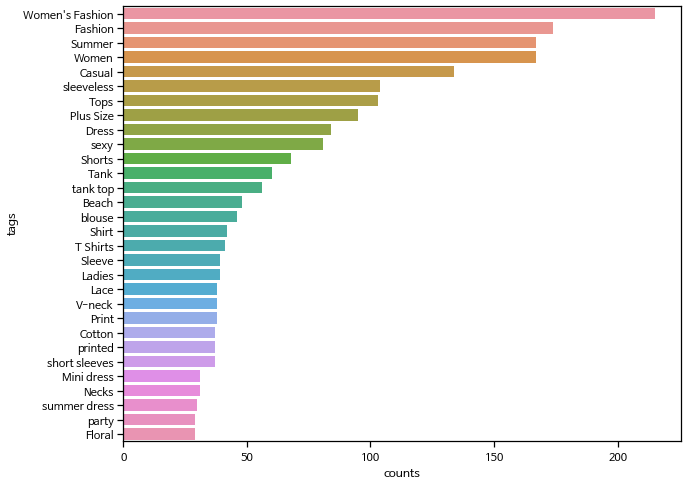

In [87]:
# 시각화 
plt.figure(figsize =(10,8))
sns.barplot(x = 'counts', y = 'tags', data = tag_counts_df)

In [88]:
# 라이브러리 불러오기
from wordcloud import WordCloud
import platform

if platform.system() =='windows':
  font_path = 'c:/Windows/Fonts/malgun.ttf'

(-0.5, 799.5, 399.5, -0.5)

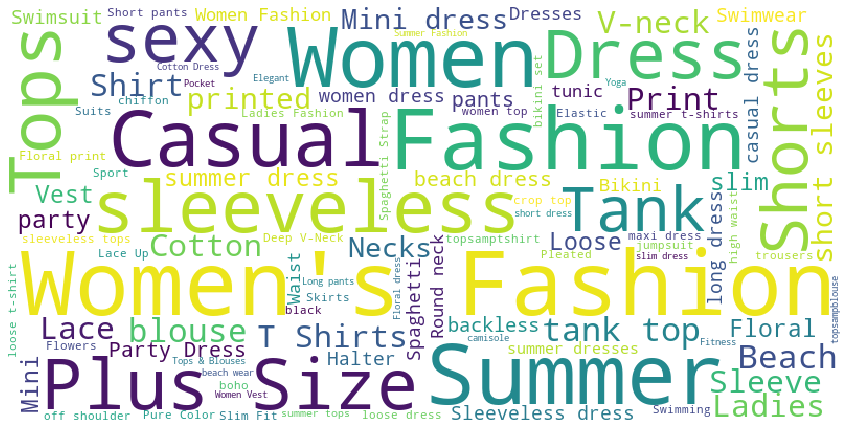

In [89]:
# 시각화 
wordcloud = WordCloud(background_color = 'white',
                      max_words = 100,
                      relative_scaling = 0.3,
                      width = 800,
                      height = 400).generate_from_frequencies(tag_counts)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud)
plt.axis('off')

성공적인 판매를 이룬 상품의 태그를 시각화 한것이다. 

**첫 번째 인사이트** : Women's Fashion, Summer, Fashion, Casual, Shorts, Plus Size, Dress, Tops, Beach sleeveless,  Sexy와 같은 키워드를 활용하는 것이 검색 최적화를 위한 키워드이다.

### 2. 제품의 평점에 따른 판매량

In [90]:
df

,title_orig,price,retail_price,uses_ad_boosts,rating,rating_count,badge_product_quality,badge_fast_shipping,tags,product_variation_inventory,shipping_option_price,countries_shipped_to,made_in_china,merchant_name,merchant_rating,merchant_has_profile_picture,successful_sold
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,0,3.8,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,4,0,1,zgrdejia,4.1,0,0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,1,3.4,2,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,2,0,1,sarahouse,3.9,0,1
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,0,3.6,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",1,3,0,1,hxt520,4.0,0,0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,1,4.0,1,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",50,2,0,1,allenfan,4.0,0,0
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,1,3.1,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",1,1,0,1,happyhorses,4.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,New Summer Fashion Trousers Women Leggings Rip...,3.00,8,1,3.8,0,0,0,"Summer,Leggings,Fashion,high waist,pants,slim,...",1,1,0,1,bujizhan,4.0,0,0
1300,Sleeveless Solid Color Women Jumpsuit Ladies S...,8.00,7,1,4.2,2,1,0,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",50,2,0,1,rellmail,4.2,0,1
1301,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,1,4.1,2,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",50,2,0,1,cxuelin99126,4.2,0,1
1302,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,0,3.7,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",15,2,0,1,shixueying,4.0,0,0


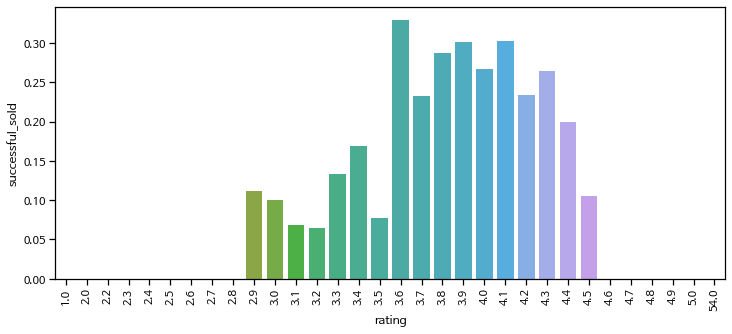

In [91]:
# 제품 평점에 따른 판매량 시각화
plt.figure(figsize = (12, 5))
sns.set_context('notebook')
sns.barplot(x = df['rating'], y = df['successful_sold'],ci = None)
plt.xticks(rotation = 90);

대체로 평점 평균이 3.6이상 4.4이하일때 가장 판매를 잘 할가능성이 높다.

왜 평점이 가장좋은제품의 판매는 성공적이지 못했을까?
그리고 어떻게해야 판매량이 많은 평점에 들어갈까?

In [92]:
# 보기편한 순서대로 컬럼 정리
df = df[['title_orig','tags', 'price', 'retail_price', 'rating', 'rating_count', 'successful_sold','merchant_rating', 'uses_ad_boosts', 'badge_product_quality', 'badge_fast_shipping', 'product_variation_inventory', 'shipping_option_price','countries_shipped_to', 'made_in_china','merchant_name','merchant_has_profile_picture']]

In [93]:
# 평점이 5인 데이터 분석
df[df['rating']==5]

,title_orig,tags,price,retail_price,rating,rating_count,successful_sold,merchant_rating,uses_ad_boosts,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,countries_shipped_to,made_in_china,merchant_name,merchant_has_profile_picture
5,Plus Size Summer Women Casual Sleeveless Rompe...,"Deep V-Neck,Summer,Plus Size,Spaghetti Strap,O...",3.92,9,5.0,0,0,3.5,0,0,0,1,1,0,1,zhoulinglinga,0
61,Women s New Fashion Solid Color Pants Loose Ca...,"Summer,Fashion,pants,widelegpant,Women's Fashi...",5.00,38,5.0,0,0,3.7,1,0,0,17,1,0,1,zufanqiudinli,0
116,Summer Casual Front Knot Cotton Sleeveless Irr...,"Summer,Vest,Plus Size,Tank,Tops,V-neck,Fashion...",7.00,6,5.0,0,0,4.0,0,0,0,50,2,0,1,aishoumat,0
123,Ladies Summer Tie Dye Print Short Sleeve Off S...,"Summer,Plus Size,Tie Dye,tiedyeprint,Dyes,Dres...",5.00,5,5.0,0,0,3.8,0,0,0,5,2,0,1,chaoyang_yangjianfa,0
202,Short Sleeve Beach Dress Women Summer Print V ...,"Summer,short sleeve dress,neck dress,Necks,Sle...",8.00,10,5.0,0,0,3.9,0,0,0,5,2,0,1,zhuangyuping1,0
287,Fashion Crop Top for Women Spaghetti Strap V N...,"Summer,Plus Size,crop top,clubwear,Tank,Tops,S...",5.00,5,5.0,0,0,4.2,0,0,0,13,2,0,1,cxuelin99126,0
292,Summer New Europe and The United States Sexy R...,"Summer,Flowers,Necks,printed,Pocket,fashion dr...",8.00,26,5.0,0,0,3.7,0,0,0,50,2,0,1,lishanshan78wgv,0
306,Anti-Fog Summer Swimming Full Face Mask Surfac...,"divingsnorkel,divingmask,Summer,divingequipmen...",14.00,12,5.0,0,0,4.2,0,0,0,5,3,0,1,velocitee,0
345,2020 New Upgrade 170/150/100/30CM Inflatable S...,"Summer,children39stoy,Outdoor,summerswimming,s...",11.00,10,5.0,0,0,4.2,0,0,0,3,2,0,1,happinessmakerczycl,0
704,2020 Summer Men's Classic Shorts Multi-pocket ...,"joggingpant,Shorts,Casual pants,pants,Summer,O...",7.00,17,5.0,0,0,3.6,0,0,0,2,2,0,1,10daysdelivery,0


평점이 5인 제품의 경우 rating_count와 successful_sold모두 0인것으로 확인이 되었다.즉, 극 소수의 인원이 최고평점을 준것으로 보이며 많은 판매를 기록하지는 못한 상품임을 알 수 있다.

평점과 판매량이  완전 비례하지 않는다는것을 알 수 있다.

어떻게 하면 판매량을 높게 만들 수 있을까


### 3. 판매량 높은 제품의 특징

< 분석결과 > 

-  판매자 프로필 상태 설정(프로필이 있는경우 인기가 높음) 
-  지속적으로 좋은 상품 뱃지를 받은 판매자 일 수록 판매량이 높음
-  배송비가 4유로 이상이면 성공적인 판매율이 급격하게 낮아진다.
-  광고를 집행하는것과 안하는것은 판매율에 영향을 주지않는다.

< 분석 코드 아래 코드 확인>

In [94]:
df[df['successful_sold']==1]

,title_orig,tags,price,retail_price,rating,rating_count,successful_sold,merchant_rating,uses_ad_boosts,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,countries_shipped_to,made_in_china,merchant_name,merchant_has_profile_picture
1,Women's Casual Summer Sleeveless Sexy Mini Dress,"Mini,womens dresses,Summer,Patchwork,fashion d...",8.0,22,3.4,2,1,3.9,1,0,0,50,2,0,1,sarahouse,0
6,Women Fashion Loose Lace Blouse V Neck Bat Sle...,"blouse,Women,lace t shirt,summer t-shirts,Lace...",7.0,6,3.8,2,1,4.1,0,0,0,50,2,0,1,uniquelifashionshopbb657bfe91d211e598c7063a14d...,1
14,2019 Summer Women's Fashion New Sleeveless Pol...,"Summer,Fashion,Mini,Dress,Loose,Polkas,V-neck,...",2.0,2,3.6,2,1,4.1,1,0,0,1,1,0,1,pentiumhorse,0
16,New Summer Women's Fashion Sleeveless Polka Do...,"Summer,fashion women,Fashion,Mini,Dresses,Tops...",11.0,10,3.7,2,1,4.0,0,0,0,50,2,0,1,2312hangm,0
17,2018 New Fashion Women's Tops Sexy Strappy Sle...,"blouse,Plus Size,Lace,lace top,Tops,Fashion,st...",5.0,25,3.8,2,1,3.9,1,0,0,50,1,0,1,leiston,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,2017 Women Ladies Summer Dress Sleeveless Casu...,"Summer,Fashion,Cocktail,Mini,Dress,Mini dress,...",8.0,30,3.6,2,1,4.1,0,0,0,50,2,0,1,beauty_baby_baby,0
1279,Plus Size XS-7XL Summer Women Fashion Round Ne...,"Summer,Plus Size,Mini,plus size dress,Dress,Mi...",11.0,12,4.0,1,1,4.1,0,0,0,50,2,0,1,ainiu,0
1294,Summer Fashion Women's Jumpsuit Floral Print S...,"Summer,trousers,Floral print,Fashion,Print,Lon...",13.0,11,4.1,2,1,4.1,0,0,0,50,3,0,1,teamwolf,1
1300,Sleeveless Solid Color Women Jumpsuit Ladies S...,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",8.0,7,4.2,2,1,4.2,1,1,0,50,2,0,1,rellmail,0


- 판매자 프로필사진이 판매에 미치는 영향

In [95]:
df[df['merchant_has_profile_picture']==0]

,title_orig,tags,price,retail_price,rating,rating_count,successful_sold,merchant_rating,uses_ad_boosts,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,countries_shipped_to,made_in_china,merchant_name,merchant_has_profile_picture
0,2020 Summer Vintage Flamingo Print Pajamas Se...,"Summer,Fashion,womenunderwearsuit,printedpajam...",16.00,14,3.8,0,0,4.1,0,0,0,50,4,0,1,zgrdejia,0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,"Mini,womens dresses,Summer,Patchwork,fashion d...",8.00,22,3.4,2,1,3.9,1,0,0,50,2,0,1,sarahouse,0
2,2020 New Arrival Women Spring and Summer Beach...,"Summer,cardigan,women beachwear,chiffon,Sexy w...",8.00,43,3.6,0,0,4.0,0,0,0,1,3,0,1,hxt520,0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",8.00,8,4.0,1,0,4.0,1,0,0,50,2,0,1,allenfan,0
4,Women Summer Shorts Lace Up Elastic Waistband ...,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",2.72,3,3.1,0,0,4.0,1,0,0,1,1,0,1,happyhorses,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,New Summer Fashion Trousers Women Leggings Rip...,"Summer,Leggings,Fashion,high waist,pants,slim,...",3.00,8,3.8,0,0,4.0,1,0,0,1,1,0,1,bujizhan,0
1300,Sleeveless Solid Color Women Jumpsuit Ladies S...,"bodycon jumpsuits,nightwear,Shorts,slim,Body S...",8.00,7,4.2,2,1,4.2,1,1,0,50,2,0,1,rellmail,0
1301,New Fashion Women Bohemia Dandelion Print Tee ...,"bohemia,Plus Size,dandelionfloralprinted,short...",6.00,9,4.1,2,1,4.2,1,0,0,50,2,0,1,cxuelin99126,0
1302,New Men Siwmwear Beach-Shorts Men Summer Quick...,"runningshort,Beach Shorts,beachpant,menbeachsh...",5.00,19,3.7,0,0,4.0,0,0,0,15,2,0,1,shixueying,0


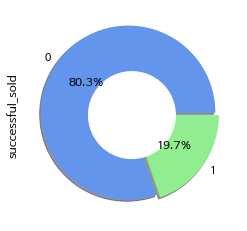

In [96]:
df[df['merchant_has_profile_picture']==0]['successful_sold'].value_counts().plot.pie(autopct = '%1.1f%%',colors = ['cornflowerblue','lightgreen'],explode = (0.05,0),shadow = True)
centre_circle = plt.Circle((0,0),0.50,color='white')
plt.gca().add_artist(centre_circle)

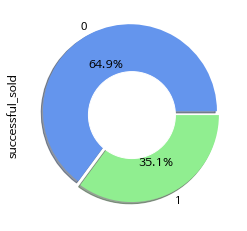

In [97]:
df[df['merchant_has_profile_picture']==1]['successful_sold'].value_counts().plot.pie(autopct = '%1.1f%%', explode = (0.05,0),colors = ['cornflowerblue','lightgreen'],shadow = True)
centre_circle = plt.Circle((0,0),0.50,color='white')
plt.gca().add_artist(centre_circle)

프로필 url설정이 있는경우 성공적인 판매로 이어지는 경우가 15.4% 상승한것을 볼 수 있다.

- 지속적으로 상품에 대해 좋은평가를 받은 제품의 여부에 따른 판매량 성공 비교

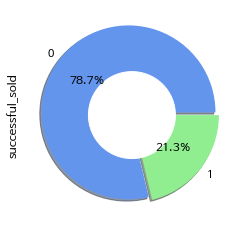

In [98]:
df[df['badge_product_quality']==0]['successful_sold'].value_counts().plot.pie(autopct = '%1.1f%%', explode = (0.05,0),colors = ['cornflowerblue','lightgreen'],shadow = True)
centre_circle = plt.Circle((0,0),0.5,color='white')
plt.gca().add_artist(centre_circle)

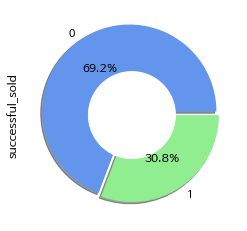

In [99]:
df[df['badge_product_quality']==1]['successful_sold'].value_counts().plot.pie(autopct = '%1.1f%%', explode = (0.05,0),colors = ['cornflowerblue','lightgreen'],shadow = True)
centre_circle = plt.Circle((0,0),0.5,color='white')
plt.gca().add_artist(centre_circle)

지속적으로 좋은 제품 평가를 받는경우가 9.5% 더 높은 성공판매에 해당된다.

- 배송비에 따른 판매량 추이 분석

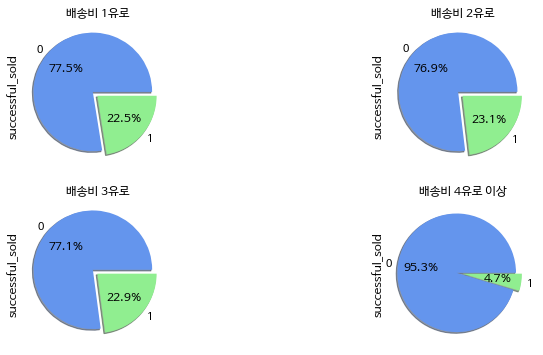

In [100]:
fig, ax = plt.subplots(2,2, figsize = (12, 6));
sns.set_palette('husl')
df[df['shipping_option_price']<4]['successful_sold'].value_counts().plot.pie(autopct = '%1.1f%%', explode = (0.1,0),ax = ax[0,0],colors = ['cornflowerblue','lightgreen'],shadow = True);
df[df['shipping_option_price']==2]['successful_sold'].value_counts().plot.pie(autopct = '%1.1f%%', explode = (0.1,0),ax = ax[0,1],colors = ['cornflowerblue','lightgreen'],shadow = True);
df[df['shipping_option_price']==3]['successful_sold'].value_counts().plot.pie(autopct = '%1.1f%%', explode = (0.1,0),ax = ax[1,0],colors = ['cornflowerblue','lightgreen'],shadow = True);
df[df['shipping_option_price']>=4]['successful_sold'].value_counts().plot.pie(autopct = '%1.1f%%', explode = (0.1,0),ax = ax[1,1],colors = ['cornflowerblue','lightgreen'],shadow = True);

ax[0,0].set_title('배송비 1유로');
ax[0,1].set_title('배송비 2유로');
ax[1,0].set_title('배송비 3유로');
ax[1,1].set_title('배송비 4유로 이상');

배송비가 4유로 이상이 되면 판매량이 줄어든다는 것을 확인할 수 있다>

- 광고와 성공적인판매와의 관계 분석

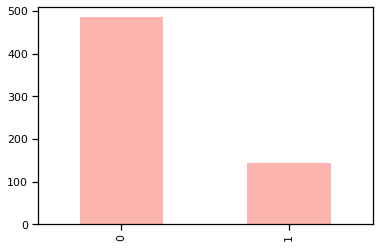

In [112]:
sns.set_palette('Pastel1')
df[df['uses_ad_boosts']==0]['successful_sold'].value_counts().plot.bar()

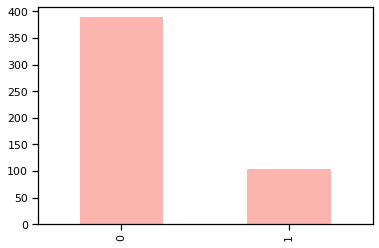

In [113]:
sns.set_palette('Pastel1')
df[df['uses_ad_boosts']==1]['successful_sold'].value_counts().plot.bar()

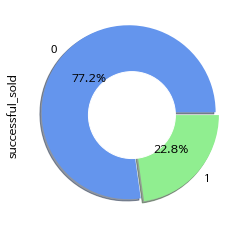

In [ ]:
df[df['uses_ad_boosts']==0]['successful_sold'].value_counts().plot.pie(autopct = '%1.1f%%', explode = (0.05,0),colors = ['cornflowerblue','lightgreen'],shadow = True)
centre_circle = plt.Circle((0,0),0.5,color='white')
plt.gca().add_artist(centre_circle)

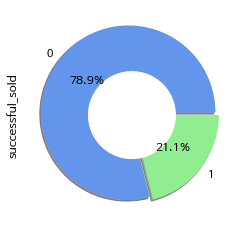

In [ ]:
df[df['uses_ad_boosts']==1]['successful_sold'].value_counts().plot.pie(autopct = '%1.1f%%', explode = (0.05,0),colors = ['cornflowerblue','lightgreen'],shadow = True)
centre_circle = plt.Circle((0,0),0.5,color='white')
plt.gca().add_artist(centre_circle)

광고는 성공적인 판매에 큰영향이 없는것으로 보인다.

### 4. 제목과 판매량의 상관관계

In [ ]:
df.loc[df['successful_sold']==1,'title_orig']

1        Women's Casual Summer Sleeveless Sexy Mini Dress
6       Women Fashion Loose Lace Blouse V Neck Bat Sle...
14      2019 Summer Women's Fashion New Sleeveless Pol...
16      New Summer Women's Fashion Sleeveless Polka Do...
17      2018 New Fashion Women's Tops Sexy Strappy Sle...
                              ...                        
1278    2017 Women Ladies Summer Dress Sleeveless Casu...
1279    Plus Size XS-7XL Summer Women Fashion Round Ne...
1294    Summer Fashion Women's Jumpsuit Floral Print S...
1300    Sleeveless Solid Color Women Jumpsuit Ladies S...
1301    New Fashion Women Bohemia Dandelion Print Tee ...
Name: title_orig, Length: 247, dtype: object

In [ ]:
# 인사이트 도출을 위해서만 사용했던 필요하지않은 특징들 제거
df = df.drop(columns = ['tags', 'merchant_name'], axis = 1)
df

,title_orig,price,retail_price,rating,rating_count,successful_sold,merchant_rating,uses_ad_boosts,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,countries_shipped_to,made_in_china,merchant_has_profile_picture
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,3.8,0,0,4.1,0,0,0,50,4,0,1,0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,3.4,2,1,3.9,1,0,0,50,2,0,1,0
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,3.6,0,0,4.0,0,0,0,1,3,0,1,0
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,4.0,1,0,4.0,1,0,0,50,2,0,1,0
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,3.1,0,0,4.0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,New Summer Fashion Trousers Women Leggings Rip...,3.00,8,3.8,0,0,4.0,1,0,0,1,1,0,1,0
1300,Sleeveless Solid Color Women Jumpsuit Ladies S...,8.00,7,4.2,2,1,4.2,1,1,0,50,2,0,1,0
1301,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,4.1,2,1,4.2,1,0,0,50,2,0,1,0
1302,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,3.7,0,0,4.0,0,0,0,15,2,0,1,0


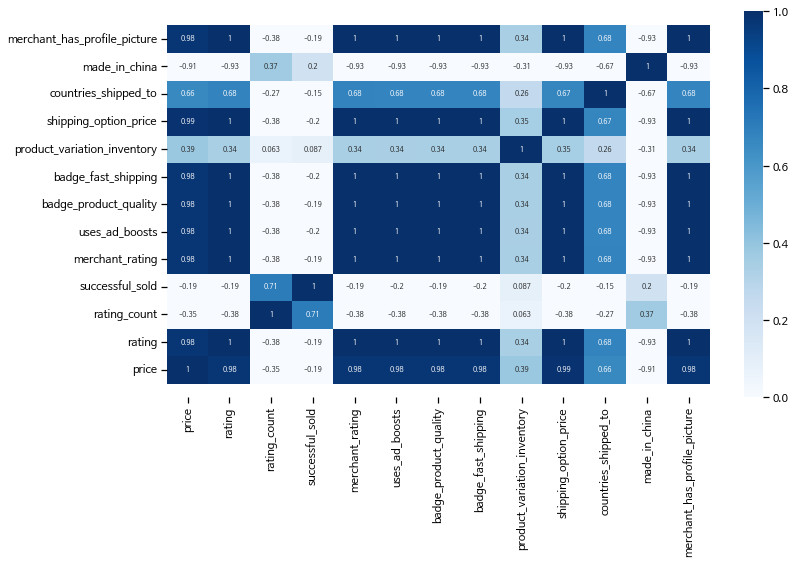

In [ ]:
# 모델링 하기전 데이터의 상관관계 확인
sns.set_context('notebook')
plt.figure(figsize =(12, 8))
ax = sns.heatmap(df.corr(),vmin = 0, vmax =1, cmap ='Blues',annot = True, annot_kws={"size": 7})
ax.set_ylim(-0.5, 13.5)  # 해당 코드가 없으면 히트맵이 위아래로 잘려서 출력된다.
fig = ax.figure
fig.tight_layout()


소매가격은 일반 가격과 비교했을때 다른컬럼들과의 관계에서 다 조금씩 떨어지는 경향을 보이고 있다. 따라서 소매가격이 아닌 일반 판매가격으로만 데이터를 사용하기로 했다.

In [ ]:
# 소매가격 컬럼 제거
df = df.drop(columns = 'retail_price')
df

**컬럼들이 서로 0.98이상의 상관관계를 갖는 경우가 적지않은데 분석의 문제인가? 추후에 연구해보고 확인해보고 반드시 알아내야할 과제!!**

최종 EDA결과

- 성공적인 판매를 위해서는 해당상품이 사용한 태그를 이용하여 검색에 있어서 최적화전략을 사용한다.

- 평점이 제품의 판매량과 직결되지않고 오히려 해당상품의 질을 늘려 뱃지를 받았을 경우 
  해당 판매자는 하나의 상품이 아닌 다양한 상품에서 성공적인 판매를 기록할 수 있다.

- 판매자의 프로필을 볼 수 있을 때 더욱더 판매량이 높은 것으로 보아 좀 더 상호 신뢰를 형성할 수 있다고 생각한다. 
	
- 광고의 여부가 판매에 영향을 미치지 않기 때문에 무계획적인 광고를 통한 상품판매는
  오히려 자원의 낭비로 이어질 수 있다.

# 모델링

## Baseline model 설정 및 평가지표 설정

타겟 설정

In [ ]:
# 상품이 "성공적인 판매량을 기록했는가" 를 target변수로 지정
target = 'successful_sold'
feature = df.columns.drop('successful_sold')

데이터셋 분리 

In [ ]:
# 데이터 분리
train, test = train_test_split(df, test_size = 0.2, shuffle = True, random_state = 42)
X_train = train[feature]
X_test = test[feature]
y_train = train[target]
y_test = test[target]


### 첫번째 모델링

In [ ]:
# Baseline model (XGBoost)
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
model = XGBClassifier(n_estimators= 100)
scores = cross_val_score(model, X_train, y_train, cv =5, scoring = 'f1')
scores.mean()

0.8406679604572925

In [ ]:
# F1-score
from sklearn.metrics import f1_score
model = model.fit(X_train,y_train)
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
f1

0.8909090909090909

베이스라인 모델을 XG부스터로 잡았다. 요즘 부스팅 모델이 잘 나오기 때문에 다른 모델을 베이스 라인 쓰는것 보다는 부스팅 모델을 pure한 상태로 베이스라인을 잡고 파라미터 조정을 통해 모델을 업그레이드하여 사용할 예정이다.

부스팅 모델을 기준모델로 잡다보니 생각보다 높은 f1-score인 0.89가 나왔다.

평가지표는 분류의 경우 정확도를 사용해도 되지만 해당 데이터 셋은 imbalanced한 데이터 이므로 f1-score를 평가지표로 사용하였다.

In [ ]:
# 첫번째 모델링 실험 : XGBoost모델에 하이퍼파라미터 최적화 하기
# GridSearchCV를 활용
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =42)

xgb_param = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.01]
}

grid_xgb = GridSearchCV(xgb, param_grid=xgb_param, scoring='f1', cv=5)
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5],
                         'learning_rate': [0.05, 0.01], 'ma

In [ ]:
# 최적의 파라미터 
grid_xgb.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.5,
 'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 1,
 'subsample': 0.8}

In [ ]:
# best parameter로 학습된 모델로 테스트 데이터 예측 및 평가
from sklearn.metrics import f1_score
xgb_pred = grid_xgb.best_estimator_.predict(X_test)
f1 = f1_score(y_test, xgb_pred)
f1

0.8807339449541284

하이퍼 파라미터 최적화를 진행하였지만 오히려 성능이 떨어진 0.88이 나왔다.

### 두번째 모델링


In [ ]:
# Baseline model : GradientBoost
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
gb = GradientBoostingClassifier(random_state=42)
gb_cross = cross_val_score(gb, X_train, y_train, cv=5, scoring = 'f1')
gb_cross.mean()

0.8381180223285487

In [ ]:
# 기준모델 f1-score 구하기
from sklearn.metrics import f1_score
gb = gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
f1 = f1_score(y_test, y_pred)
f1

0.8461538461538461

그레디언트 부스트를 사용해서 베이스라인 모델 0.84이다.

In [ ]:
#두번째 모델링 실험 :  GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingClassifier(random_state=42)

gb_param = {
    'n_estimators': [100],
    'min_samples_leaf': [7, 9, 13],
    'max_depth': [4, 5, 6, 7],
    'learning_rate': [0.05, 0.02, 0.01]
}

grid_gb = GridSearchCV(gb, param_grid=gb_param, scoring='f1', cv=5)
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...e=None,
          

In [ ]:
grid_gb.best_params_

{'learning_rate': 0.02,
 'max_depth': 6,
 'min_samples_leaf': 13,
 'n_estimators': 100}

In [ ]:
# best parameter로 학습된 모델로 테스트 데이터 예측 및 평가
from sklearn.metrics import f1_score
gb_pred = grid_gb.best_estimator_.predict(X_test)
f1 = f1_score(y_test, gb_pred)
f1

0.8545454545454546

그레디언트 부스트 모델로 하이퍼 파라미터 최적화 결과 0.85로 소폭 상승한 모습을 보인다.

In [ ]:
pip install pdpbox

### pdp를 통한 각 특성별 판매량에 미치는 영향

In [ ]:
# 인기에 따른 판매량의 영향
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'popular'
isolated = pdp_isolate(
    model=grid_xgb, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


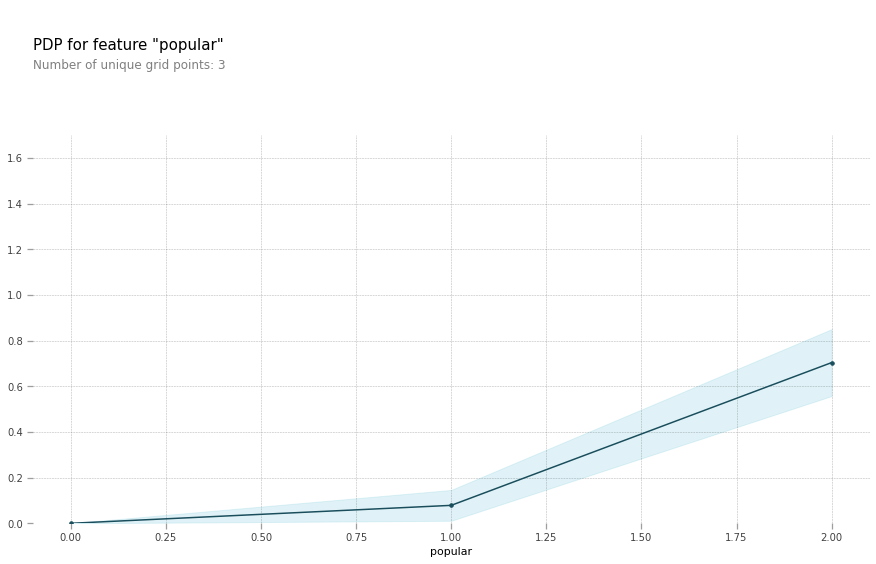

In [ ]:
pdp_plot(isolated, feature_name=feature);

인기에 따라 서서히 상승하다 1에서 2로 넘어가면서 급격히 상승한다.

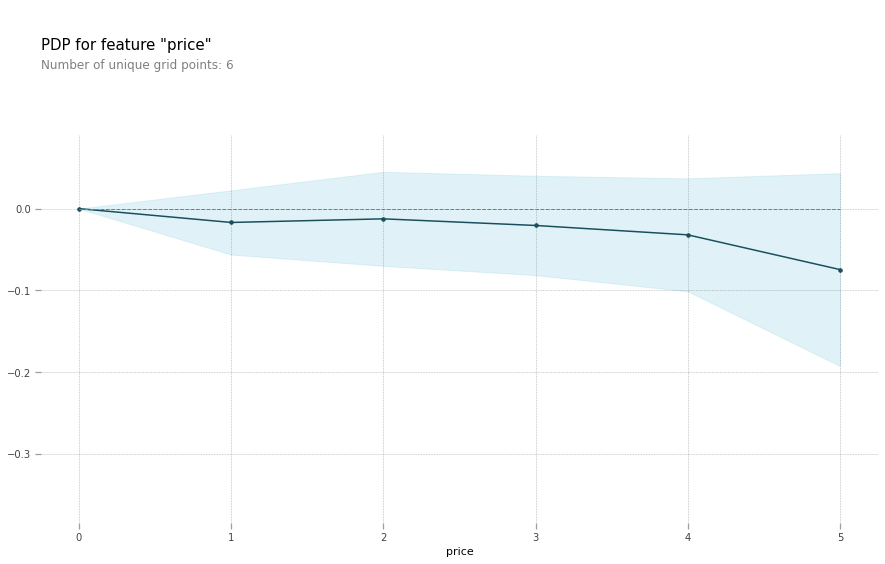

In [ ]:
feature = 'price'
isolated = pdp_isolate(
    model=grid_xgb, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature
)
pdp_plot(isolated, feature_name=feature);

가격이 높으면 판매량이 낮아진다.

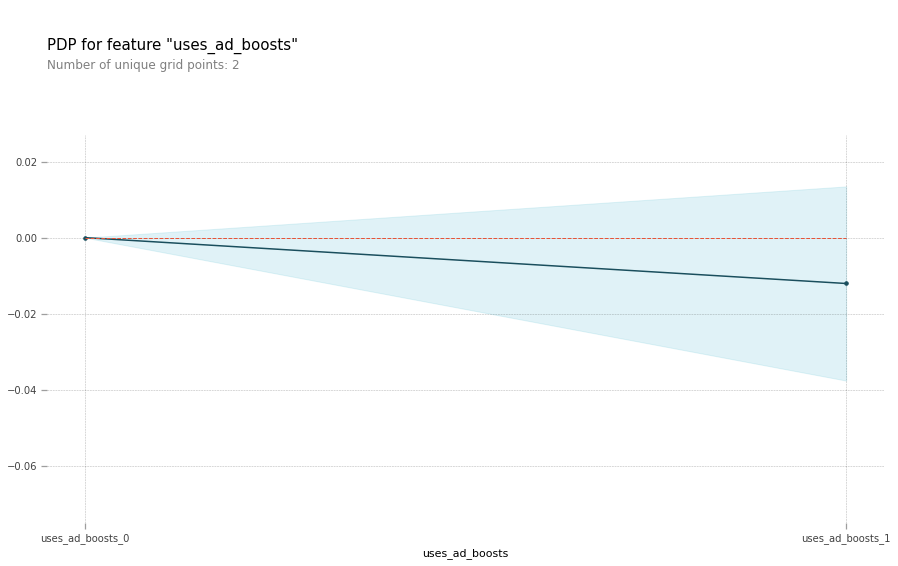

In [ ]:
feature = 'uses_ad_boosts'
isolated = pdp_isolate(
    model=grid_xgb, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature
)
pdp_plot(isolated, feature_name=feature);

추가적인 광고 여부가 판매량의 인기를 끌어올리지는 못한다. 오히려 떨어트리고 있다.

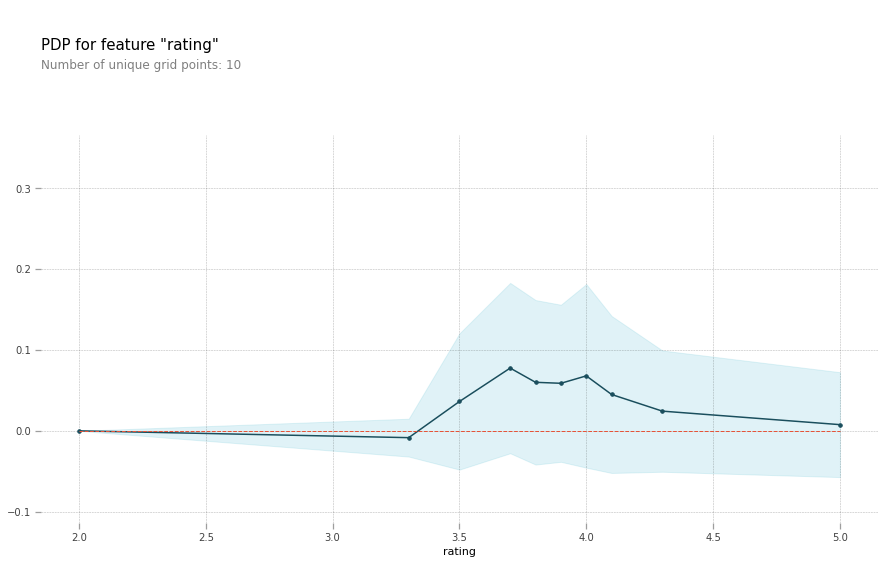

In [ ]:
feature = 'rating'
isolated = pdp_isolate(
    model=grid_xgb, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature
)
pdp_plot(isolated, feature_name=feature);

평점 평균이 5라고 해서 높은것이 아니다, 이유는 전처리에서 말했듯이 소수의 인원이 분포되어 있기 때문이다.

In [ ]:
pip install shap

In [ ]:
row = X_test
grid_xgb

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5],
                         'learning_rate': [0.05, 0.01], 'ma

[14:42:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


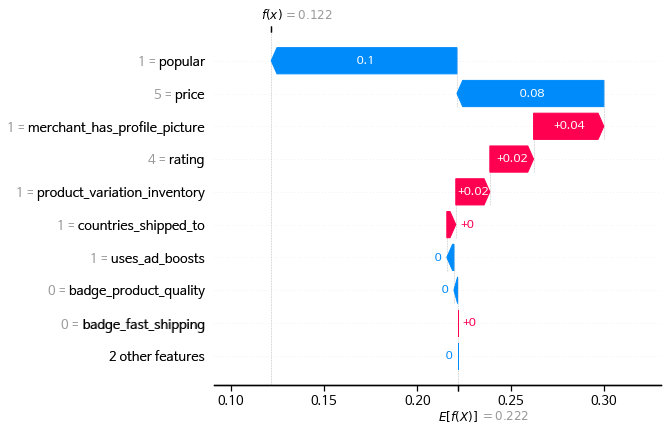

In [ ]:
import xgboost
model = xgboost.XGBRegressor().fit(X_train, y_train)
explainer = shap.Explainer(model)
shap_values = explainer(X_train)
shap.plots.waterfall(shap_values[0])